In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
import pandas as pd 
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import os
from jupyter_dash import JupyterDash
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import plotly.graph_objects as go


In [3]:
from scipy import signal
from scipy.fft import fftshift

In [4]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import FactorAnalysis
from scipy.linalg import svd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import LeaveOneOut,ShuffleSplit
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc #permutation_importance
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import label_binarize

import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd


In [5]:
import neptune
import neptune.integrations.sklearn as npt_utils
from neptune.types import File


## Pre-prepraing ML dataset

In [6]:

# df = pd.read_csv("/Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/analysis_table_revised_2_new.csv")
features_df = pd.read_csv("/Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/features_with_new_freq.csv")



In [7]:
features_df["type"].value_counts()

type
1    2801
0    2523
Name: count, dtype: int64

In [8]:
features_df

,Accel_X_mean,Accel_Y_mean,Accel_Z_mean,Gyro_X_mean,Gyro_Y_mean,Gyro_Z_mean,Magno_X_mean,Magno_Y_mean,Magno_Z_mean,Accel_Vecdis_mean,...,Accel_AUC_fft,Gyro_AUC_fft,Magno_AUC_fft,type,Participent,Watch ID,Activity,gender,age,Behavior
0,0.650536,0.615739,0.586771,0.489904,0.447446,0.562563,0.306750,0.445059,0.339938,1.077979,...,111426.325800,760750.042800,2.901450e+06,0,P10,Left,A1,F,10,NoHyp 1.csv
1,0.697159,0.382353,0.313508,0.386259,0.571220,0.556493,0.620687,0.701784,0.602655,0.906401,...,61.199614,720.166644,1.507065e+03,0,P10,Left,A2,F,10,NoHyp 1.csv
2,0.636103,0.486417,0.542405,0.524915,0.707070,0.214858,0.265429,0.489656,0.486747,1.103225,...,26.419067,208.888327,8.580593e+02,0,P10,Left,A2,F,10,NoHyp 2.csv
3,0.588662,0.335918,0.618827,0.495632,0.405018,0.476948,0.326466,0.471884,0.241401,0.945372,...,3442.492270,24965.200910,6.899545e+04,0,P10,Left,A2,F,10,NoHyp 3.csv
4,0.598583,0.525161,0.488855,0.309784,0.558376,0.277467,0.538554,0.634420,0.492219,1.001122,...,2494.211073,19352.068560,4.968155e+04,0,P10,Left,A2,F,10,NoHyp 4.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5319,0.449995,0.560480,0.694133,0.390699,0.367892,0.481154,0.580280,0.385376,0.555731,1.019033,...,399.647045,1677.657627,1.795113e+03,1,P9,Right,A4,F,7,Talking to peers 5.csv
5320,0.719897,0.663395,0.754436,0.636727,0.795071,0.158660,0.217602,0.306854,0.146392,1.256103,...,26.344885,353.365394,3.818158e+02,1,P9,Right,A4,F,7,Talking to peers 6.csv
5321,0.523890,0.500252,0.373366,0.432442,0.511205,0.543979,0.528048,0.591868,0.273113,0.836364,...,1459.255319,9588.086716,1.050976e+04,1,P9,Right,A4,F,7,Talking to peers 7.csv
5322,0.337627,0.477885,0.450648,0.319415,0.593763,0.451276,0.537676,0.537691,0.417064,0.769088,...,28.885394,45.119601,4.469113e+02,1,P9,Right,A4,F,7,Talking to peers 8.csv


In [9]:
features_df["type"].value_counts()

type
1    2801
0    2523
Name: count, dtype: int64

In [10]:
features_df_1 = features_df[['Accel_X_sum_fft','Accel_Y_sum_fft', 'Accel_Z_sum_fft',
'Gyro_X_sum_fft', 'Gyro_Y_sum_fft', 'Gyro_Z_sum_fft',
'Accel_X_AUC_fft','Accel_Y_AUC_fft','Accel_Z_AUC_fft',
'Gyro_X_AUC_fft','Gyro_Y_AUC_fft','Gyro_Z_AUC_fft',
'Accel_X_skewness_fft', 'Accel_Y_skewness_fft','Accel_Z_skewness_fft',
'Gyro_X_skewness_fft','Gyro_Y_skewness_fft','Gyro_Z_skewness_fft',
'Accel_X_kurtosis_fft','Accel_Y_kurtosis_fft','Accel_Z_kurtosis_fft',
'Gyro_X_kurtosis_fft','Gyro_Y_kurtosis_fft','Gyro_Z_kurtosis_fft',
'Accel_X_std_fft', 'Accel_Y_std_fft','Accel_Z_std_fft',
'Gyro_X_std_fft','Gyro_Y_std_fft', 'Gyro_Z_std_fft',
'Accel_X_mean_fft','Accel_Y_mean_fft','Accel_Z_mean_fft',
'Gyro_X_mean_fft','Gyro_Y_mean_fft','Gyro_Z_mean_fft',
'Accel_X_diff_sum_fft','Accel_Y_diff_sum_fft','Accel_Z_diff_sum_fft',
'Gyro_X_diff_sum_fft','Gyro_Y_diff_sum_fft','Gyro_Z_diff_sum_fft',
'type', 'Participent', 'Watch ID', 'Activity', 'gender', 'age', 'Behavior']]


In [11]:
features_df =features_df[['Accel_X_mean', 'Accel_Y_mean', 'Accel_Z_mean',
                                 'Gyro_X_mean','Gyro_Y_mean', 'Gyro_Z_mean', 
                                 'Accel_X_std', 'Accel_Y_std', 'Accel_Z_std',
                               'Gyro_X_std', 'Gyro_Y_std', 'Gyro_Z_std', 
                               'Accel_X_kurtosis','Accel_Y_kurtosis','Accel_Z_kurtosis', 
                                'Gyro_X_kurtosis', 'Gyro_Y_kurtosis', 'Gyro_Z_kurtosis', 
                                'Accel_X_skewness','Accel_Y_skewness','Accel_Z_skewness', 
                                 'Gyro_X_skewness', 'Gyro_Y_skewness', 'Gyro_Z_skewness',
                          'type', 'Participent', 'Watch ID', 'Activity', 'gender', 'age', 'Behavior']]

In [12]:
for i in features_df["Behavior"].unique():
    print(i)

NoHyp 1.csv
NoHyp 2.csv
NoHyp 3.csv
NoHyp 4.csv
NoHyp 5.csv
NoHyp 6.csv
NoHyp 7.csv
NoHyp 8.csv
NoHyp 9.csv
Standing up while working  1.csv
Standing up while working  2.csv
Standing up while working  3.csv
Standing up while working  4.csv
Standing up while working  5.csv
Standing up while working  6.csv
Standing up while working  7.csv
Standing up while working  8.csv
Manipulating object (turning pen over and over in hand) 1.csv
Moving the chair back and forth 1.csv
Moving the chair back and forth 2.csv
NoHyp 10.csv
NoHyp 11.csv
NoHyp 12.csv
NoHyp 13.csv
NoHyp 14.csv
NoHyp 15.csv
NoHyp 16.csv
NoHyp 17.csv
NoHyp 18.csv
NoHyp 19.csv
NoHyp 20.csv
NoHyp 21.csv
NoHyp 22.csv
Talking to peers 1.csv
Talking to peers 10.csv
Talking to peers 11.csv
Talking to peers 12.csv
Talking to peers 13.csv
Talking to peers 14.csv
Talking to peers 15.csv
Talking to peers 16.csv
Talking to peers 17.csv
Talking to peers 18.csv
Talking to peers 2.csv
Talking to peers 3.csv
Talking to peers 4.csv
Talking to pe

In [13]:
def pre_datacleaning(features_df):
    ################################################
    # Filter out specfic behaviour types.
    ################################################
    # Define the strings you want to filter , Moving the chair back and forth 2.csv
    # strings_to_remove = ['peers', 'self']#'foot','leg','object','fingers','hair','Standing','tapping']
    df_standing = features_df[features_df['Behavior'].str.contains("Standing")]
    df_standing["newFeatureName"] = "SW"
    #df_standing["BehaviourTypeCleaned"] = 1
    df_mov_chair = features_df[features_df['Behavior'].str.contains("chair")]
    df_mov_chair["newFeatureName"] = "MC"
    #df_mov_chair["BehaviourTypeCleaned"] = 2
    df_object = features_df[features_df['Behavior'].str.contains("Manipulating")] 
    df_object["newFeatureName"] = "MO"
    #df_object["BehaviourTypeCleaned"] = 3
    df_twriling_hair = features_df[features_df['Behavior'].str.contains("Twirling")] 
    df_twriling_hair["newFeatureName"] = "TH"
    #df_twriling_hair["BehaviourTypeCleaned"] = 4
    
    df_drumming = features_df[features_df['Behavior'].str.contains("Drumming")]
    df_drumming["newFeatureName"] = "DF"
    #df_drumming["BehaviourTypeCleaned"] = 5
    
    df_finger_tap = features_df[features_df['Behavior'].str.contains("Finger")] 
    df_finger_tap["newFeatureName"] = "FT"
    #df_finger_tap["BehaviourTypeCleaned"] = 6
    
    df_no_hyp  =  features_df[features_df['Behavior'].str.contains("NoHyp")]
    df_no_hyp["newFeatureName"] = "NH"
    #df_no_hyp["BehaviourTypeCleaned"] = 7
    
    df_combined = pd.concat([df_no_hyp,df_mov_chair,df_twriling_hair,df_object,df_drumming,df_finger_tap,df_standing])
    return df_combined


In [14]:
# duration_of_each_activity.to_csv("~/Desktop/duration_sanitized_names.csv")

In [57]:
################################################
# Filter outliers in the data set.
################################################
def remove_outliers(df):
    # Initialize with all indices
    filtered_indices = set(df.index)
    non_filtered_indices = set(df.index)
    col_list = []
    percent_drop_list = []
    for col in df.columns:
        subsrtings= ["Accel","Gyro", "Magno"] # If the sting consists of these 4 variab;es
        if any(substring in col for substring in subsrtings):
            if df[col].dtype in ['float64', 'int64']:  # Apply only to numeric columns
               # print("Columns :----------------------------- ",col)
                Q1 = df[col].quantile(0.25)
                Q3 = df[col].quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 3.0 * IQR
                upper_bound = Q3 + 3.0 * IQR
                # Find the indices where the data is not an outlier
                valid_indices = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)].index
                filtered_indices = filtered_indices.intersection(set(valid_indices))
                percentage_dropped = ((df[col].shape[0] - len(valid_indices))/ df[col].shape[0] )*100
                #print("Percentage Dropped: ",percentage_dropped)
                col_list.append(col)
                percent_drop_list.append(percentage_dropped)
    fig = go.Figure(data=[
        go.Bar(name='', x=col_list, y=percent_drop_list,
              # text=int(percent_drop_list),
            textposition='auto',
              ),
           
        # go.Bar(name='LA Zoo', x=animals, y=[12, 18, 29])
    ])
    # Change the bar mode
    fig.update_layout(template="ggplot2")
    fig.show()
    filtered_df = df.loc[list(filtered_indices)]
    #outliers_df = filtered_df[~filtered_df.index.isin(filtered_df.index)]
    outliers_df = df[~df.index.isin(filtered_df.index)]

    return filtered_df,outliers_df

In [61]:
def run_outlier_code(df):
    print("Before Removing Outliers: ",df["type"].value_counts())
    # Get unique values in the 'type' column
    unique_types = df['type'].unique()
    # Create a MinMaxScaler object
    scaler = MinMaxScaler()
    search_strings = ["Standing","chair","NoHyp","Manipulating","Twirling","Drumming","Finger"]
    type_df_outlier = []
    outliers_df_actual_outlier = []
    outlier_data = []
    # Iterate through the search strings
    for search_string in search_strings:
        print("========================== Behaviour Type========================== ",search_string)
        # Use boolean indexing to filter rows for the current search string
        filtered_df = df[df["Behavior"].str.contains(search_string, case=False, na=False)]
        value_counts_dict = filtered_df["type"].value_counts().to_dict()
        total_count_before = list(value_counts_dict.values())[0]
        print("Total Count: ",total_count_before)
        type_df = filtered_df.drop(columns=['type', 'Participent', 'Watch ID', 'Activity', 'gender', 'age', 'Behavior'])
        # Store the 'type' column separately
        type_column = filtered_df['type']
        type_behaviour_col = filtered_df["Behavior"]
        type_df_rm_out,outliers_actual = remove_outliers(type_df)
        outliers_df_actual_outlier.append(outliers_actual)
        print("outliers_actual: ",outliers_actual)
        # Add the 'type' column back to the DataFrame
        type_df_rm_out['type'] = type_column
        type_df_rm_out["Behavior"] = type_behaviour_col
        value_counts_dict_after = type_df_rm_out["type"].value_counts().to_dict()
        total_count_after = list(value_counts_dict_after.values())[0]
        print("Total count after: ",total_count_after)
        print("count_After: ",type_df_rm_out["type"].value_counts())
        print("Total Percentage: ",((total_count_before- total_count_after)/total_count_before)*100)
        type_df_outlier.append(type_df_rm_out)
       # outlier_data.append(outlier_data_df)
    outlier_df = pd.concat(type_df_outlier)
    actual_outlier = pd.concat(outliers_df_actual_outlier)
    return outlier_df, actual_outlier  


In [62]:
def normalize_dataset(df):
    # Dictionary to store filtered DataFrames
    filtered_dfs = {}
    # Get unique values in the 'type' column
    unique_types = df['type'].unique()
    # Create a MinMaxScaler object
    scaler = MinMaxScaler()
    search_strings = ["Standing","chair","NoHyp","Manipulating","Twirling","Drumming","Finger"]
    type_df_normalized_list = []
    # Iterate through the search strings
    for search_string in search_strings:
        # Use boolean indexing to filter rows for the current search string
        filtered_df = df[df["Behavior"].str.contains(search_string, case=False, na=False)]
    
        type_df = filtered_df.drop(columns=['type','Behavior'])
        type_val = filtered_df["type"]
        # type_behaviourType_col = filtered_df["BehaviourTypeCleaned"]
        # Apply the scaler to the current subset of data
        type_df_normalized = scaler.fit_transform(type_df)
        # Create a DataFrame from the normalized data
        type_df_normalized = pd.DataFrame(type_df_normalized, columns=type_df.columns, index=type_df.index)
        # Add the 'type' column back to the normalized DataFrame
        type_df_normalized['type'] = type_val
        #type_df_normalized["BehaviourTypeCleaned"] = type_behaviourType_col
        type_df_normalized_list.append(type_df_normalized)
    normalized_df = pd.concat(type_df_normalized_list)
    return normalized_df

In [52]:
df_combined_1 =pre_datacleaning(features_df)

/var/folders/d3/mwqwbw3x0b30c22zykpzcrww0000gn/T/ipykernel_1326/1987404306.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/d3/mwqwbw3x0b30c22zykpzcrww0000gn/T/ipykernel_1326/1987404306.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/d3/mwqwbw3x0b30c22zykpzcrww0000gn/T/ipykernel_1326/1987404306.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [53]:
df_combined_1.columns

Index(['Accel_X_mean', 'Accel_Y_mean', 'Accel_Z_mean', 'Gyro_X_mean',
       'Gyro_Y_mean', 'Gyro_Z_mean', 'Accel_X_std', 'Accel_Y_std',
       'Accel_Z_std', 'Gyro_X_std', 'Gyro_Y_std', 'Gyro_Z_std',
       'Accel_X_kurtosis', 'Accel_Y_kurtosis', 'Accel_Z_kurtosis',
       'Gyro_X_kurtosis', 'Gyro_Y_kurtosis', 'Gyro_Z_kurtosis',
       'Accel_X_skewness', 'Accel_Y_skewness', 'Accel_Z_skewness',
       'Gyro_X_skewness', 'Gyro_Y_skewness', 'Gyro_Z_skewness', 'type',
       'Participent', 'Watch ID', 'Activity', 'gender', 'age', 'Behavior',
       'newFeatureName'],
      dtype='object')

In [54]:
df_combined_1["newFeatureName"].value_counts()

newFeatureName
NH    2523
MC     895
TH     247
SW     191
MO      96
FT      36
DF      27
Name: count, dtype: int64

In [55]:
df_combined_1["type"].value_counts()

type
0    2523
1    1492
Name: count, dtype: int64

Before Removing Outliers:  type
0    502
1    340
Name: count, dtype: int64
========================== Behaviour Type==========================  Standing
Total Count:  56


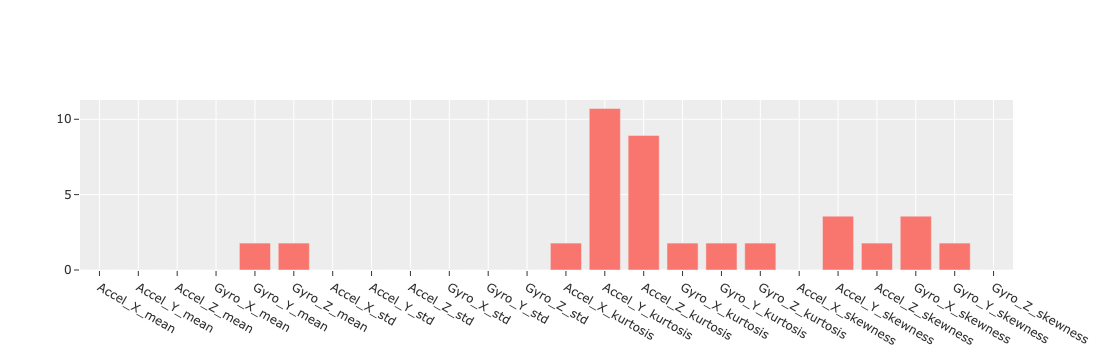

outliers_actual:        Accel_X_mean  Accel_Y_mean  Accel_Z_mean  Gyro_X_mean  Gyro_Y_mean  \
12        0.596300      0.444461      0.527418     0.757906     0.419697   
957       0.300122      0.509259      0.634259     0.869973     0.713750   
1681      0.378605      0.500123      0.191959     0.484259     0.616277   
1846      0.511450      0.384608      0.675172     0.351724     0.534816   
2523      0.600719      0.614342      0.482428     0.540546     0.541344   
2644      0.505136      0.778946      0.494031     0.618711     0.471406   
2966      0.712551      0.805863      0.246777     0.515597     0.434679   
2969      0.624136      0.590839      0.410459     0.501150     0.220281   
3009      0.478138      0.769220      0.188199     0.436348     0.640595   
3011      0.517692      0.872148      0.135375     0.463491     0.548710   
3650      0.000000      0.000000      0.000000     0.000000     0.000000   
4953      0.612447      0.342347      0.636227     0.422526     0.4220

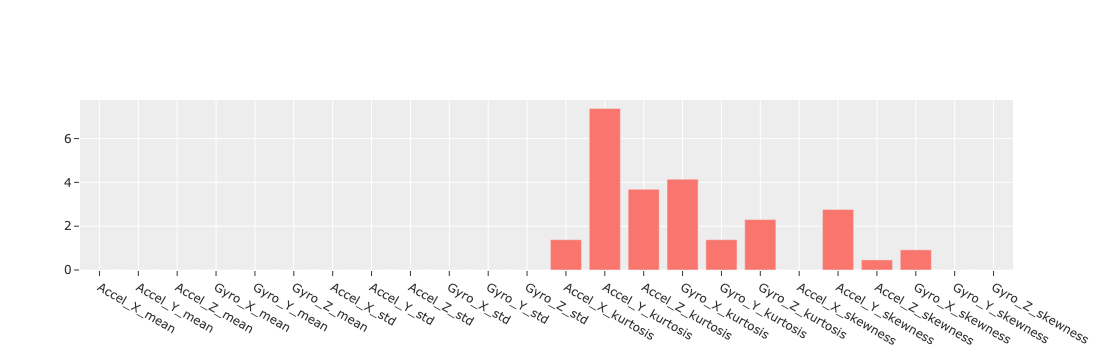

outliers_actual:        Accel_X_mean  Accel_Y_mean  Accel_Z_mean  Gyro_X_mean  Gyro_Y_mean  \
826       0.464671      0.408904      0.868739     0.617051     0.649388   
2044      0.465426      0.185807      0.111754     0.520071     0.237839   
2674      0.544323      0.348370      0.674864     0.659422     0.519090   
2681      0.570522      0.434892      0.562907     0.382925     0.599426   
2687      0.529979      0.292020      0.645125     0.444099     0.457118   
2689      0.699059      0.418817      0.472785     0.695703     0.510284   
2841      0.544247      0.798045      0.308454     0.743005     0.343619   
2847      0.454749      0.603343      0.358867     0.612161     0.512970   
2848      0.285602      0.151511      0.393146     0.431716     0.641529   
2850      0.701930      0.204608      0.591434     0.800353     0.455757   
2851      0.426973      0.582396      0.361603     0.412457     0.594126   
2856      0.534875      0.462300      0.554098     0.616713     0.3528

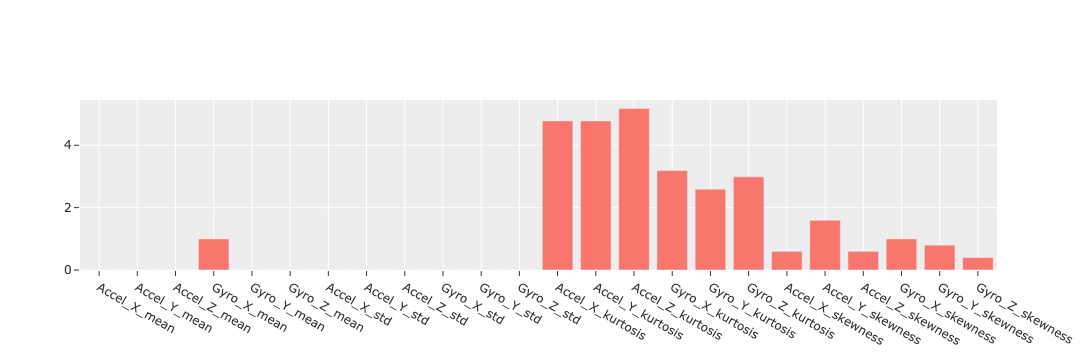

outliers_actual:        Accel_X_mean  Accel_Y_mean  Accel_Z_mean  Gyro_X_mean  Gyro_Y_mean  \
4         0.598583      0.525161      0.488855     0.309784     0.558376   
7         0.693370      0.575220      0.565596     0.654752     0.482682   
231       0.469767      0.400120      0.546824     0.586265     0.762341   
236       0.257374      0.460074      0.336451     0.485548     0.217754   
237       0.443471      0.532389      0.538312     0.520581     0.524371   
...            ...           ...           ...          ...          ...   
4950      0.597100      0.318194      0.332158     0.572395     0.545650   
5017      0.660803      0.405809      0.610243     0.678879     0.379876   
5070      0.675114      0.494212      0.395669     0.497728     0.629415   
5248      0.551346      0.577631      0.298429     0.518168     0.394454   
5250      0.443867      0.564447      0.276486     0.464111     0.479346   

      Gyro_Z_mean  Accel_X_std  Accel_Y_std  Accel_Z_std  Gyro_X_std 

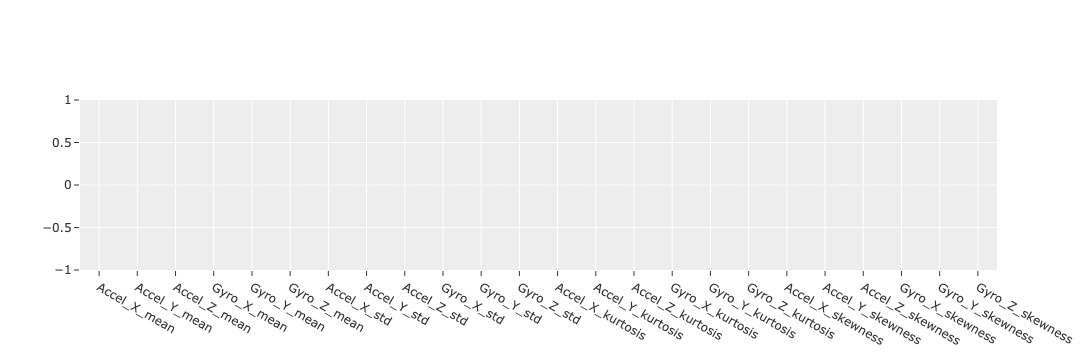

outliers_actual:  Empty DataFrame
Columns: [Accel_X_mean, Accel_Y_mean, Accel_Z_mean, Gyro_X_mean, Gyro_Y_mean, Gyro_Z_mean, Accel_X_std, Accel_Y_std, Accel_Z_std, Gyro_X_std, Gyro_Y_std, Gyro_Z_std, Accel_X_kurtosis, Accel_Y_kurtosis, Accel_Z_kurtosis, Gyro_X_kurtosis, Gyro_Y_kurtosis, Gyro_Z_kurtosis, Accel_X_skewness, Accel_Y_skewness, Accel_Z_skewness, Gyro_X_skewness, Gyro_Y_skewness, Gyro_Z_skewness, newFeatureName]
Index: []

[0 rows x 25 columns]
Total count after:  6
count_After:  type
1    6
Name: count, dtype: int64
Total Percentage:  0.0
========================== Behaviour Type==========================  Twirling
Total Count:  50


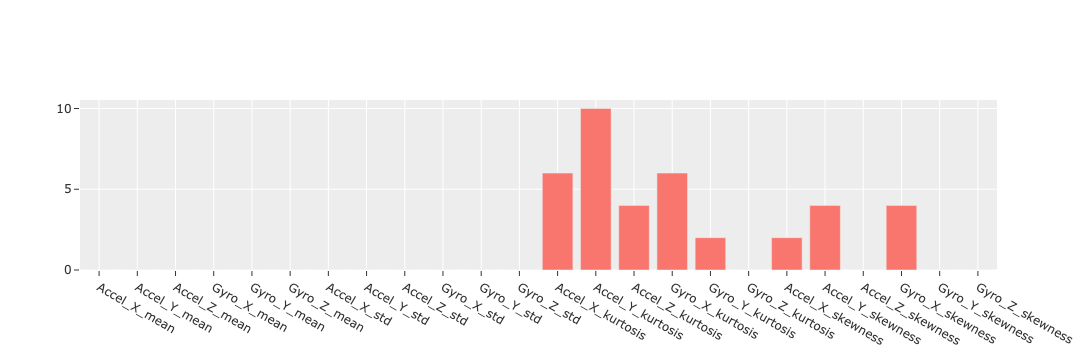

outliers_actual:        Accel_X_mean  Accel_Y_mean  Accel_Z_mean  Gyro_X_mean  Gyro_Y_mean  \
250       0.607461      0.308950      0.571769     0.492893     0.429394   
409       0.277225      0.343035      0.376165     0.405705     0.752800   
3127      0.263518      0.415183      0.600725     0.738718     0.675386   
3128      0.828160      0.874837      0.354315     0.878552     0.309062   
3131      0.529808      0.902364      0.748302     0.876099     0.657091   
3320      0.583122      0.120211      0.400995     0.615535     0.261285   
3323      0.368088      0.600750      0.167808     0.330339     0.381822   
3327      0.705973      0.469120      0.567905     0.748509     0.511936   
3328      0.561936      0.843961      0.456893     0.525300     0.398437   
3330      0.727376      0.342637      0.285038     0.559729     0.418816   

      Gyro_Z_mean  Accel_X_std  Accel_Y_std  Accel_Z_std  Gyro_X_std  ...  \
250      0.384001     0.189450     0.098765     0.268020    0.111727

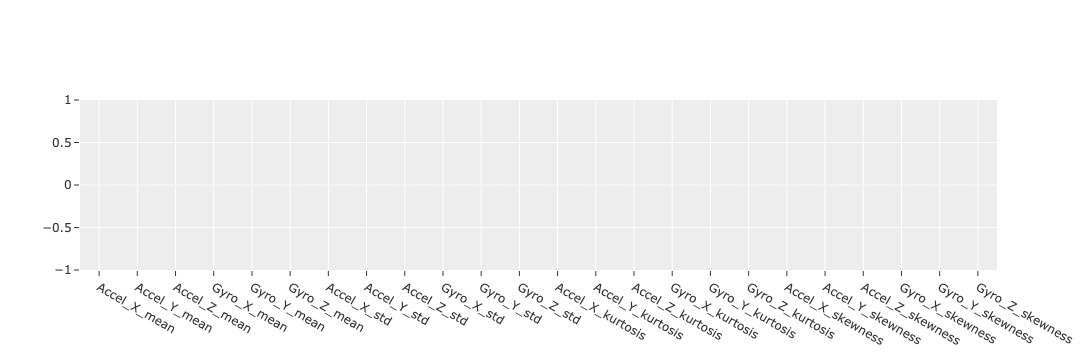

outliers_actual:  Empty DataFrame
Columns: [Accel_X_mean, Accel_Y_mean, Accel_Z_mean, Gyro_X_mean, Gyro_Y_mean, Gyro_Z_mean, Accel_X_std, Accel_Y_std, Accel_Z_std, Gyro_X_std, Gyro_Y_std, Gyro_Z_std, Accel_X_kurtosis, Accel_Y_kurtosis, Accel_Z_kurtosis, Gyro_X_kurtosis, Gyro_Y_kurtosis, Gyro_Z_kurtosis, Accel_X_skewness, Accel_Y_skewness, Accel_Z_skewness, Gyro_X_skewness, Gyro_Y_skewness, Gyro_Z_skewness, newFeatureName]
Index: []

[0 rows x 25 columns]
Total count after:  7
count_After:  type
1    7
Name: count, dtype: int64
Total Percentage:  0.0
========================== Behaviour Type==========================  Finger
Total Count:  11


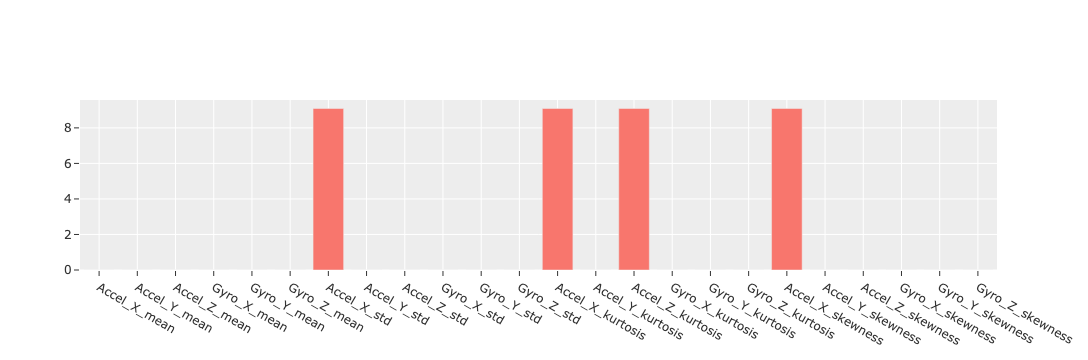

outliers_actual:        Accel_X_mean  Accel_Y_mean  Accel_Z_mean  Gyro_X_mean  Gyro_Y_mean  \
3989      0.753120      0.346564      0.152182     0.391160     0.333160   
4452      0.425986      0.689142      0.233757     0.606435     0.462484   

      Gyro_Z_mean  Accel_X_std  Accel_Y_std  Accel_Z_std  Gyro_X_std  ...  \
3989     0.487332     0.175238     0.186428     0.216554    0.174198  ...   
4452     0.479896     0.278363     0.198514     0.198994    0.204858  ...   

      Gyro_X_kurtosis  Gyro_Y_kurtosis  Gyro_Z_kurtosis  Accel_X_skewness  \
3989         6.132749         6.097615         0.614943         -3.392441   
4452         2.187594         0.962754         0.701433          0.739586   

      Accel_Y_skewness  Accel_Z_skewness  Gyro_X_skewness  Gyro_Y_skewness  \
3989          2.183690          3.132447         1.040943         1.868874   
4452         -2.168288          2.420699        -1.089643         0.349201   

      Gyro_Z_skewness  newFeatureName  
3989        -0

In [63]:
df_filtered_outliers,actual_outlier = run_outlier_code(df_combined_1[df_combined_1["Activity"]=="A2"])
num_droped_0 = df_combined_1["type"].value_counts()[0]-df_filtered_outliers["type"].value_counts()[0]
num_droped_1 = df_combined_1["type"].value_counts()[1]-df_filtered_outliers["type"].value_counts()[1]
print("Percentage Count Dropped 0: ",(num_droped_0/df_combined_1["type"].value_counts()[0])*100)
print("Percentage Count Dropped 1: ",(num_droped_1/df_combined_1["type"].value_counts()[1])*100)


In [28]:
df_filtered_outliers["type"].value_counts()

type
0    421
1    296
Name: count, dtype: int64

In [65]:
df_filtered_outliers

,Accel_X_mean,Accel_Y_mean,Accel_Z_mean,Gyro_X_mean,Gyro_Y_mean,Gyro_Z_mean,Accel_X_std,Accel_Y_std,Accel_Z_std,Gyro_X_std,...,Gyro_Z_kurtosis,Accel_X_skewness,Accel_Y_skewness,Accel_Z_skewness,Gyro_X_skewness,Gyro_Y_skewness,Gyro_Z_skewness,newFeatureName,type,Behavior
901,0.634530,0.419441,0.402987,0.498060,0.465003,0.478991,0.134384,0.097014,0.099392,0.059941,...,18.146649,-0.887587,1.146486,-1.220664,-0.125453,0.470869,-0.190857,SW,1,Standing up while working 1.csv
1290,0.502379,0.476839,0.460961,0.590522,0.471309,0.558356,0.206149,0.265791,0.273965,0.231727,...,-1.000107,-0.064540,0.312876,0.287058,-0.662496,0.076665,-0.361669,SW,1,Standing up while working 1.csv
11,0.405340,0.303248,0.560777,0.354774,0.189701,0.758203,0.326006,0.218624,0.299446,0.148606,...,7.143508,0.816121,0.565455,-0.995440,2.216569,2.955180,-2.491625,SW,1,Standing up while working 2.csv
10,0.580000,0.551785,0.621636,0.626387,0.525592,0.573748,0.159927,0.190291,0.239772,0.133018,...,2.180059,-0.427851,-0.270161,-0.948873,-1.278540,-0.233235,-0.330604,SW,1,Standing up while working 1.csv
13,0.471317,0.439363,0.497466,0.377302,0.440637,0.472099,0.191168,0.245430,0.278397,0.100826,...,5.611738,0.081489,0.021431,-0.588008,1.842636,0.366192,0.757550,SW,1,Standing up while working 4.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,0.497243,0.398217,0.347513,0.407278,0.326403,0.660034,0.198357,0.173048,0.199617,0.205939,...,4.961927,-0.094763,1.200719,1.464731,1.123232,1.345217,-2.010267,DF,1,Drumming fingers 1.csv
741,0.545948,0.508926,0.634147,0.452832,0.718292,0.559088,0.158931,0.152812,0.162638,0.117573,...,7.001434,-0.170747,0.031883,-0.995399,0.397602,-3.106319,-0.897502,DF,1,Drumming fingers 3.csv
3086,0.503846,0.397500,0.391071,0.502819,0.339608,0.587618,0.177639,0.220776,0.216228,0.187731,...,6.182686,-0.502804,0.719579,0.338113,-0.300224,1.602206,-1.530619,FT,1,Finger tapping 1.csv
3633,0.467011,0.498640,0.739240,0.109848,0.656273,0.395727,0.168686,0.164770,0.300225,0.219883,...,0.687115,-0.707071,-0.077538,-1.892898,3.021415,-2.573933,0.844765,DF,1,Drumming fingers 1.csv


In [66]:
actual_outlier.columns

Index(['Accel_X_mean', 'Accel_Y_mean', 'Accel_Z_mean', 'Gyro_X_mean',
       'Gyro_Y_mean', 'Gyro_Z_mean', 'Accel_X_std', 'Accel_Y_std',
       'Accel_Z_std', 'Gyro_X_std', 'Gyro_Y_std', 'Gyro_Z_std',
       'Accel_X_kurtosis', 'Accel_Y_kurtosis', 'Accel_Z_kurtosis',
       'Gyro_X_kurtosis', 'Gyro_Y_kurtosis', 'Gyro_Z_kurtosis',
       'Accel_X_skewness', 'Accel_Y_skewness', 'Accel_Z_skewness',
       'Gyro_X_skewness', 'Gyro_Y_skewness', 'Gyro_Z_skewness',
       'newFeatureName'],
      dtype='object')

In [68]:
actual_outlier["newFeatureName"].value_counts()

newFeatureName
NH    81
MC    25
SW    14
TH    10
FT     2
Name: count, dtype: int64

In [27]:
df_filtered_outliers["type"].value_counts()

type
0    421
1    296
Name: count, dtype: int64

In [28]:
df_filtered_outliers["type"].value_counts()

type
0    421
1    296
Name: count, dtype: int64

###### 

In [29]:
fig = px.box(actual_outlier_df, x="type", y="Accel_Z_mean", points="all")
fig.show()

NameError: name 'actual_outlier_df' is not defined

In [ ]:
for i in df_combined.columns:
    print(i)

In [ ]:
fig = px.box(df_combined, x="BehaviourTypeCleaned", y="Accel_AUC_fft",points="all")
fig.show()
#Standing- 1, chair - 2, Manipulating-3, Twirling=4, Drumming=5, Finger=6,NoHyp=7


In [ ]:
fig = px.box(df_filtered_outliers, x="BehaviourTypeCleaned", y="Accel_AUC_fft",points="all")
fig.show()


In [39]:
df_filtered_outliers_normalized = normalize_dataset(df_filtered_outliers)


In [28]:
# df_filtered_outliers_normalized.to_csv("~/Desktop/norm_features_statistical.csv")

In [ ]:
################################################
# Balance the imbalance dataset.
################################################
def random_undersampling(df):
    # Count the number of 0s and 1s
    count_0 = len(df[df['type'] == 0])
    count_1 = len(df[df['type'] == 1])
    
    # Determine the number to undersample from the 0s
    count_to_sample = min(count_0, count_1)
    
    # Randomly sample 0s
    df_0_sampled = df[df['type'] == 0].sample(count_to_sample)
    
    # Get all 1s
    df_1 = df[df['type'] == 1]
    
    # Combine the two to create a balanced dataset
    df_balanced = pd.concat([df_0_sampled, df_1])
    return df_balanced

In [ ]:
df["type"].value_counts()

In [ ]:
df.shape

In [ ]:
# df = df[df["Activity"]=='A4']

In [ ]:
#https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
def smote_oversampling(df):
    # # Separate features and target
    X = df.drop('type', axis=1)  # Features
    y = df['type']               # Target
    # Initialize SMOTE
    smote = SMOTE()
    X_train_smote, y_train_smote = smote.fit_resample(X, y)
    # Combine the resampled data back into a DataFrame
    df_resampled = pd.concat([pd.DataFrame(X_train_smote, columns=X.columns), pd.DataFrame(y_train_smote, columns=['type'])], axis=1)
    return df_resampled
    # df_resampled is the DataFrame with oversampled 'type' class 1

In [ ]:
# https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=4633969
def ADASYN_resampling(df):
    # Assuming df is your DataFrame and 'type' is your target variable
    # Separate features and target
    X = df.drop('type', axis=1)
    y = df['type']
    # Applying ADASYN to the training set
    adasyn = ADASYN()
    # Splitting the dataset into training and testing sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    X, y = adasyn.fit_resample(X, y)
    
 
    # Combine the resampled data back into a DataFrame
    df_train_resampled = pd.concat([pd.DataFrame(X, columns=X.columns), pd.DataFrame(y, columns=['type'])], axis=1)
    return df_train_resampled


In [ ]:
df_ADASYN_resampled = ADASYN_resampling(df_filtered_outliers_normalized)

In [ ]:
print("Number of items in each class after ADASYN: ",df_ADASYN_resampled["type"].value_counts())

In [ ]:
df_SMOTE_resampled = smote_oversampling(df_filtered_outliers_normalized)

In [ ]:
print("Number of items n each class after SMOTE: ",df_SMOTE_resampled["type"].value_counts())

In [ ]:
df_combined.iloc[]

In [ ]:

df_SMOTE_resampled

## Scatter plot SLOM analysis of features.

In [ ]:
for i in df_SMOTE_resampled.columns:
    print(i)

In [ ]:
fig = px.scatter_matrix(df_ADASYN_resampled,
    dimensions=["Accel_X_AUC_fft","Accel_Y_AUC_fft", "Accel_Z_AUC_fft",
                "Gyro_X_AUC_fft","Gyro_Y_AUC_fft","Gyro_Z_AUC_fft"],   
    color="type",
     # symbol='Participent',

)
fig.update_layout(
    title='Q2behave Featre set AUCFFT',
    width=900,
    height=900,
    font=dict(
        # family="Courier New, monospace",
        size=7,  # Set the font size here
        # color="RebeccaPurple"
    )
)
# Update the hover data to include 'participant_id'


fig.update_traces(diagonal_visible=False)

fig.show()


In [ ]:




fig = px.scatter_matrix(df,
    dimensions=['Accel_X_zero_cross_rate', 'Accel_Y_zero_cross_rate', 'Accel_Z_zero_cross_rate',
       'Gyro_X_zero_cross_rate', 'Gyro_Y_zero_cross_rate', 'Gyro_Z_zero_cross_rate', 
       'Magno_X_zero_cross_rate','Magno_Y_zero_cross_rate', 'Magno_Z_zero_cross_rate'],   
    color="type",
     symbol='Participent',

)
fig.update_layout(
    title='Q2behave Featre set Sum Fuature',
    width=900,
    height=900,
    font=dict(
        # family="Courier New, monospace",
        size=7,  # Set the font size here
        # color="RebeccaPurple"
    )
)
# Update the hover data to include 'participant_id'


fig.update_traces(diagonal_visible=False)

fig.show()


In [ ]:


fig = px.scatter_matrix(df,
    dimensions=['Accel_X_sum', 'Accel_Y_sum', 'Accel_Z_sum',
       'Gyro_X_sum', 'Gyro_Y_sum', 'Gyro_Z_sum', 
       'Magno_X_sum', 'Magno_Y_sum', 'Magno_Z_sum', 'Gyro_Z_mean'],   
    color="type",
     symbol='Participent',

)
fig.update_layout(
    title='Q2behave Featre set Sum Fuature',
    width=900,
    height=900,
    font=dict(
        # family="Courier New, monospace",
        size=7,  # Set the font size here
        # color="RebeccaPurple"
    )
)
# Update the hover data to include 'participant_id'


fig.update_traces(diagonal_visible=False)

fig.show()


In [ ]:
fig = px.scatter_matrix(df_filtered_outliers,
    dimensions=['Accel_X_mean',
                 'Accel_Y_mean',
                 'Accel_Z_mean',
                 'Gyro_X_mean',
                 'Gyro_Y_mean',
                 'Gyro_Z_mean'],   
    color="type",
# df_filtered_outliers = run_outlier_code(df_combined_1)

)
fig.update_layout(
    title='Q2behave Featre set All Activites',
    width=900,
    height=900,
    font=dict(
        # family="Courier New, monospace",
        size=7,  # Set the font size here
        # color="RebeccaPurple"
    )
)
# Update the hover data to include 'participant_id'


fig.update_traces(diagonal_visible=False)

fig.show()


In [ ]:
# df_vec_magnitude = df[['Accel_Vecdis_mean','Gyro_Vecdis_mean',,'Magno_Vecdis_mean',
#  'Accel_Vecdis_std', 'Gyro_Vecdis_std', 'Magno_Vecdis_std',
# 'Accel_Vecdis_kurtosis', 'Gyro_Vecdis_kurtosis','Magno_Vecdis_kurtosis',
#  'Accel_Vecdis_skewness', 'Gyro_Vecdis_skewness','Magno_Vecdis_skewness']]

fig = px.scatter_matrix(df,
    dimensions=['Accel_Vecdis_mean','Gyro_Vecdis_mean','Magno_Vecdis_mean',
 'Accel_Vecdis_std', 'Gyro_Vecdis_std', 'Magno_Vecdis_std',
'Accel_Vecdis_kurtosis', 'Gyro_Vecdis_kurtosis','Magno_Vecdis_kurtosis',
 'Accel_Vecdis_skewness', 'Gyro_Vecdis_skewness','Magno_Vecdis_skewness'],   
    color="type",
     symbol='Participent',

)
fig.update_layout(
    title='Q2behave Featre set Vector Magnitude',
    width=900,
    height=900,
    font=dict(
        # family="Courier New, monospace",
        size=4,  # Set the font size here
        # color="RebeccaPurple"
    )
)
# Update the hover data to include 'participant_id'


fig.update_traces(diagonal_visible=False)

fig.show()


In [ ]:
fig = px.scatter_matrix(df[df["Activity"]=="A1.csv"],
    dimensions=['Accel_X_mean',
                 'Accel_Y_mean',
                 'Accel_Z_mean',
                 'Gyro_X_mean',
                 'Gyro_Y_mean',
                 'Gyro_Z_mean'],   
    color="type",
     symbol='Participent',

)
fig.update_layout(
    title='Q2behave Featre set Activity 1',
    width=900,
    height=900,
    font=dict(
        # family="Courier New, monospace",
        size=7,  # Set the font size here
        # color="RebeccaPurple"
    )
)
# Update the hover data to include 'participant_id'


fig.update_traces(diagonal_visible=False)

fig.show()


In [ ]:
fig = px.scatter_matrix(df[df["Activity"]=="A2.csv"],
    dimensions=['Accel_X_mean',
                 'Accel_Y_mean',
                 'Accel_Z_mean',
                 'Gyro_X_mean',
                 'Gyro_Y_mean',
                 'Gyro_Z_mean'],   
    color="type",
     symbol='Participent',
)
fig.update_layout(
    title='Q2behave Featre set Activity 2',
    width=900,
    height=900,
    font=dict(
        # family="Courier New, monospace",
        size=7,  # Set the font size here
        # color="RebeccaPurple"
    )
)
# Update the hover data to include 'participant_id'


fig.update_traces(diagonal_visible=False)

fig.show()


In [ ]:
fig = px.scatter_matrix(df[df["Activity"]=="A3.csv"],
    dimensions=['Accel_X_mean',
                 'Accel_Y_mean',
                 'Accel_Z_mean',
                 'Gyro_X_mean',
                 'Gyro_Y_mean',
                 'Gyro_Z_mean'],   
    color="type",
     symbol='Participent',

)
fig.update_layout(
    title='Q2behave Featre set Activity 3',
    width=900,
    height=900,
    font=dict(
        # family="Courier New, monospace",
        size=7,  # Set the font size here
        # color="RebeccaPurple"
    )
)
# Update the hover data to include 'participant_id'


fig.update_traces(diagonal_visible=False)

fig.show()


In [ ]:
fig = px.scatter_matrix(df[df["Activity"]=="A4.csv"],
    dimensions=['Accel_X_mean',
                 'Accel_Y_mean',
                 'Accel_Z_mean',
                 'Gyro_X_mean',
                 'Gyro_Y_mean',
                 'Gyro_Z_mean'],   
    color="type",
     symbol='Participent',

)
fig.update_layout(
    title='Q2behave Featre set Activity 4',
    width=900,
    height=900,
    font=dict(
        # family="Courier New, monospace",
        size=7,  # Set the font size here
        # color="RebeccaPurple"
    )
)
# Update the hover data to include 'participant_id'


fig.update_traces(diagonal_visible=False)

fig.show()


In [ ]:
fig = px.scatter_matrix(df,
    dimensions=['Accel_X_kurtosis', 'Accel_Y_kurtosis', 'Accel_Z_kurtosis',
       'Gyro_X_kurtosis', 'Gyro_Y_kurtosis', 'Gyro_Z_kurtosis'],   
    color="type",
     symbol='Participent',

)
fig.update_layout(
    title='Q2behave Featre set kurtosis',
    width=900,
    height=900,
    font=dict(
        # family="Courier New, monospace",
        size=7,  # Set the font size here
        # color="RebeccaPurple"
    )
)
# Update the hover data to include 'participant_id'


fig.update_traces(diagonal_visible=False)

fig.show()


In [ ]:
# df[df["Activity"]=='A1.csv'].shape

fig = px.scatter_matrix(df,
    dimensions=[#'Accel_Vecdis_mean','Gyro_Vecdis_mean','Magno_Vecdis_mean',
 #'Accel_Vecdis_std', 'Gyro_Vecdis_std', #'Magno_Vecdis_std', 'Accel_Vecdis_kurtosis',
 'Gyro_Vecdis_kurtosis',#'Magno_Vecdis_kurtosis',
 'Accel_Vecdis_skewness', 'Gyro_Vecdis_skewness'] ,#'Magno_Vecdis_skewness'],
    color="type")
fig.update_layout(
    title='Q2behave Featre set Vector Magnitude',
    width=900,
    height=900,
    font=dict(
        # family="Courier New, monospace",
        size=7,  # Set the font size here
        # color="RebeccaPurple"
    )
)
fig.update_traces(diagonal_visible=False)

fig.show()

In [ ]:
# df[df["Activity"]=='A1.csv'].shape

fig = px.scatter_matrix(df,
    dimensions=['Accel_Vecdis_mean','Gyro_Vecdis_mean','Magno_Vecdis_mean',
 'Accel_Vecdis_std', 'Gyro_Vecdis_std', 'Magno_Vecdis_std', 'Accel_Vecdis_kurtosis',
 'Magno_Vecdis_kurtosis','Magno_Vecdis_skewness'],
    color="type")
fig.update_layout(
    title='Q2behave Featre set Vector Magnitude',
    width=900,
    height=900,
    font=dict(
        # family="Courier New, monospace",
        size=7,  # Set the font size here
        # color="RebeccaPurple"
    )
)
fig.update_traces(diagonal_visible=False)

fig.show()

In [ ]:

# df[df["Activity"]=='A1.csv'].shape

fig = px.scatter_matrix(df_resampled,
    dimensions=[ "Accel_X_AUC_fft","Accel_Y_AUC_fft","Accel_Z_AUC_fft",
          "Gyro_X_AUC_fft","Gyro_Y_AUC_fft","Gyro_Z_AUC_fft"],
    color="type")
fig.update_layout(
    title='Q2behave Featre set Vector Magnitude',
    width=900,
    height=900,
    font=dict(
        # family="Courier New, monospace",
        size=7,  # Set the font size here
        # color="RebeccaPurple"
    )
)
fig.update_traces(diagonal_visible=False)

fig.show()

## Factor Analysis

In [ ]:
df["Activity"].unique()

In [ ]:

for i in df.columns:
    print(i)

In [ ]:
## (1) Take Absolute value of the loadings 
## (2) ±0.3 or ±0.4 #  A high absolute value indicates that the variable contributes significantly to that factor.
# Properly Select the number of factors. 

# Returns a list of relevant features
def perform_factor_analysis(df):
    factor_analysis_df = df[['Accel_X_mean', 'Accel_Y_mean', 'Accel_Z_mean', 'Gyro_X_mean',
       'Gyro_Y_mean', 'Gyro_Z_mean', 'Magno_X_mean', 'Magno_Y_mean',
       'Magno_Z_mean', 'Accel_Vecdis_mean', 'Gyro_Vecdis_mean',
       'Magno_Vecdis_mean',
       'Accel_X_std', 'Accel_Y_std', 'Accel_Z_std', 'Gyro_X_std', 'Gyro_Y_std',
       'Gyro_Z_std', 'Magno_X_std', 'Magno_Y_std', 'Magno_Z_std',
       'Accel_Vecdis_std', 'Gyro_Vecdis_std', 'Magno_Vecdis_std',
       'Accel_X_kurtosis', 'Accel_Y_kurtosis', 'Accel_Z_kurtosis',
       'Gyro_X_kurtosis', 'Gyro_Y_kurtosis', 'Gyro_Z_kurtosis',
       'Magno_X_kurtosis', 'Magno_Y_kurtosis', 'Magno_Z_kurtosis',
       'Accel_Vecdis_kurtosis', 'Gyro_Vecdis_kurtosis',
       'Magno_Vecdis_kurtosis', 'Accel_X_skewness', 'Accel_Y_skewness',
       'Accel_Z_skewness', 'Gyro_X_skewness', 'Gyro_Y_skewness',
       'Gyro_Z_skewness', 'Magno_X_skewness', 'Magno_Y_skewness',
       'Magno_Z_skewness', 'Accel_Vecdis_skewness', 'Gyro_Vecdis_skewness',
       'Magno_Vecdis_skewness','Accel_X_sum', 'Accel_Y_sum', 'Accel_Z_sum',
       'Gyro_X_sum', 'Gyro_Y_sum', 'Gyro_Z_sum', 'Magno_X_sum', 'Magno_Y_sum',
       'Magno_Z_sum', 'Accel_Vecdis_sum', 'Gyro_Vecdis_sum',
       'Magno_Vecdis_sum', 'Accel_X_zero_cross_rate',
       'Accel_Y_zero_cross_rate', 'Accel_Z_zero_cross_rate',
       'Gyro_X_zero_cross_rate', 'Gyro_Y_zero_cross_rate',
       'Gyro_Z_zero_cross_rate', 'Magno_X_zero_cross_rate',
       'Magno_Y_zero_cross_rate', 'Magno_Z_zero_cross_rate',
    'Accel_X_dominant_freq','Accel_Y_dominant_freq','Accel_Z_dominant_freq',
    'Gyro_X_dominant_freq','Gyro_Y_dominant_freq','Gyro_Z_dominant_freq',
'Magno_X_dominant_freq','Magno_Y_dominant_freq','Magno_Z_dominant_freq',
'Accel_X_max_amplitude','Accel_Y_max_amplitude','Accel_Z_max_amplitude',
'Gyro_X_max_amplitude','Gyro_Y_max_amplitude','Gyro_Z_max_amplitude',
'Magno_X_max_amplitude','Magno_Y_max_amplitude', 'Magno_Z_max_amplitude',
'Accel_X_diff_sum','Accel_Y_diff_sum','Accel_Z_diff_sum',
'Gyro_X_diff_sum','Gyro_Y_diff_sum','Gyro_Z_diff_sum',
'Magno_X_diff_sum','Magno_Y_diff_sum','Magno_Z_diff_sum',
'Accel_Vecdis_diff_sum','Gyro_Vecdis_diff_sum','Magno_Vecdis_diff_sum']]
    # scaler = StandardScaler()
    # scaled_data = scaler.fit_transform(df)
    
    # Calculate eigenvalues using SVD
    _, s, _ = svd(factor_analysis_df)
    eigenvalues = s**2 / factor_analysis_df.shape[0]
    
    # Plot eigenvalues
    plt.figure(figsize=(10, 5))
    plt.plot(eigenvalues, 'o-')
    plt.axhline(y=1, color='r', linestyle='--')
    plt.title('Eigenvalues from Factor Analysis')
    plt.xlabel('Factor')
    plt.ylabel('Eigenvalue')
    plt.show()
    
    # Number of factors to retain based on eigenvalues > 1
    num_factors = sum(eigenvalues > 1)
    # num_factors
    # Initialize Factor Analysis with no restriction on number of components
    factor_analysis = FactorAnalysis(rotation='varimax')
    factor_loadings = factor_analysis.fit_transform(factor_analysis_df)
    
    # Extracting the loadings matrix
    loadings_matrix = pd.DataFrame(factor_analysis.components_, columns=factor_analysis_df.columns)
    
    # Let's visualize the loadings of the first few factors
    loadings_matrix.iloc[:5, :]#.transpose()
    # Set a threshold for loadings, e.g., 0.4
    threshold = 0.4
    # Extract variables with loadings above the threshold for each factor
    selected_features = set()
    for column in loadings_matrix.columns:
        high_loadings = loadings_matrix[column].abs() > threshold
        features = high_loadings.index[high_loadings].tolist()
        selected_features.update(features)
    
    # Extract the actual feature names based on the indices
    selected_feature_names = [factor_analysis_df.columns[idx] for idx in selected_features]
    return selected_feature_names,num_factors,loadings_matrix


In [ ]:
selected_feature_names,num_factors,loadings_matrix = perform_factor_analysis(df_filtered_outliers)
print("List of features selected: ",len(selected_feature_names),selected_feature_names)
print("Number of Factors: ",num_factors)

# SVM Code:

In [30]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="orange" if cm[i, j] > thresh else "orange")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [31]:
def train_test_accuracies(X_train, y_train,skf,best_model,best_params):
    train_accuracies, test_accuracies, sensitivities, specificities = [], [], [], []
    for train_index, val_index in skf.split(X_train, y_train):
        X_train_fold, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
        print("X_train_fold: ",X_train_fold.shape, "y_train_fold: ",y_train_fold.shape)
        best_model.fit(X_train_fold, y_train_fold)
        # Compute confusion matrix for this fold
        cm = confusion_matrix(y_val, best_model.predict(X_val)) # only for calculating speccificity and sensitivity.
        TP = cm[1,1]
        TN = cm[0,0]
        FP = cm[0,1]
        FN = cm[1,0]
        print("TP: ",TP,"TN: ",TN,"FP: ",FP,"FN: ",FN)
        sensitivity = TP / (TP + FN)
        specificity = TN / (TN + FP)

        train_accuracies.append(accuracy_score(y_train_fold, best_model.predict(X_train_fold)))
        test_accuracies.append(accuracy_score(y_val, best_model.predict(X_val)))
        sensitivities.append(sensitivity)
        specificities.append(specificity)
    return train_accuracies, test_accuracies, sensitivities, specificities

In [32]:
def my_train_test_split(dataframe,test_size):
    # Split data into train and test sets with shuffling
    train_data, test_data = train_test_split(dataframe, test_size=test_size, shuffle=True,random_state=8) #  random_state=random_state
    
    # Extract features and target variable from training data
    X_train = train_data.drop(columns=['type'])
    y_train = train_data['type']
    
    # Extract features and target variable from test data
    X_test = test_data.drop(columns=['type'])
    y_test = test_data['type']
    print("Original dataframe: ",dataframe.shape)
    print("X_train: ",X_train.shape, "y_train:",y_train.shape,"value counts in train:",train_data["type"].value_counts())
    print("X_test: ", X_test.shape,"y_test:  ", y_test.shape,"value counts in test:",test_data["type"].value_counts()) 

    return X_train, y_train,X_test,y_test

In [33]:
def svm_pipeline():
    # Define a pipeline: Standardization + SVM
    pipeline = Pipeline([
        # ('scaler', StandardScaler()),
        ('svm', SVC(decision_function_shape='ovo',probability=True))
    ])

    # Hyperparameters for SVM
    param_grid = {
        'svm__C': [0.1, 1,4,6,8,10,12,14,16,18,20,30,40,50,60,70,80,90,100],
        'svm__kernel': ['rbf' ,'poly','sigmoid'], #,'rbf' 'poly', 'sigmoid''linear'
        'svm__gamma': ['scale']
    }
    return pipeline,param_grid

In [34]:
def feature_importance(best_svm, X_train, y_train):
    # Calculate permutation importance
    perm_importance = permutation_importance(best_svm, X_train, y_train, n_repeats=30, random_state=42)
    # Get feature names
    feature_names = X_train.columns

    # Plotting feature importances
    sorted_idx = perm_importance.importances_mean.argsort()
    plt.barh(feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
    plt.xlabel("Permutation Importance")
    plt.title("Feature Importance in SVM Model")
    return plt

    

In [35]:
def test_set_metrics(results_df,X_train, y_train,X_test,y_test):
    # Identify the model with the highest mean test accuracy
    best_model_params = results_df.sort_values(by="mean_test_accuracy", ascending=False).iloc[0]['best_params']
    best_svm = SVC(C=best_model_params['svm__C'], kernel=best_model_params['svm__kernel'], gamma=best_model_params['svm__gamma'])
    best_svm.fit(X_train, y_train)

    
    # Predict on the test set and compute the confusion matrix.
    # X_test_scaled = scaler.transform(X_test)
    y_pred = best_svm.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Compute additional metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    print("precision: ",precision,"recall: ",recall,"f1_score",f1_score)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC Curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    # Plot the confusion matrix
    class_names = y_test.unique()
    print("class_names: ",class_names)
    plot_confusion_matrix(cm, classes=class_names)
    return cm, plt_features

In [36]:
def svm_cross_validation_with_cm(dataframe, test_size=0.2):
            
   
    """
    Trains an SVM model using cross-validation on a given dataframe and returns the confusion matrix for the best model.
    
    Parameters:
    - dataframe (pd.DataFrame): The input data.
    - test_size (float): Proportion of the dataset to include in the test split.
    - random_state (int): Random seed.
    
    Returns:
    - dict: Contains results of the cross-validation and confusion matrix.
    """
   # smote = SMOTE()
    X_train, y_train,X_test,y_test = my_train_test_split(dataframe,test_size) 
    #X_train, y_train = smote.fit_resample(X_train_my, y_train_my)
    pipeline,param_grid = svm_pipeline()

    results = []

    # Determine the maximum number of splits based on the class with the fewest samples
    max_splits = min(y_train.value_counts())
    print("max_splits: ",max_splits)
    # Hyperparameter tuning and cross-validation
    for folds in [5,10,15]: #8,9 , min(10, 20),min(15, 20)]: # 
        run = neptune.init_run(
            project="shehjar/ADHD-SVM",
            api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJlMGQxM2Q4ZC00ODE4LTRhNDMtYWY1Yy1kMGIzZTI5MzcxMzUifQ==",
            name= str(folds) + "-Fold"+ "test_size_" + str(test_size)   # Set your custom run name here
        )  # your credential
        run['feature_list'] = str(dataframe.columns)
        # File
        run["data/feature_table"].upload(File.as_html(dataframe))
        print("========================= CV folds =========================", folds)
        skf = ShuffleSplit(n_splits=folds, test_size=test_size, random_state=0) #StratifiedKFold(n_splits=folds, shuffle=True, random_state=0) #ShuffleSplit(n_splits=folds, test_size=test_size, random_state=0) #LeaveOneOut() #StratifiedKFold(n_splits=2, shuffle=True)
        print("StratifiedKFold Spliitting: m")
        grid_search = GridSearchCV(pipeline, param_grid, cv=skf, scoring='roc_auc_ovo_weighted', n_jobs=-1)
        print("grid_search GridSearchCV() Done...")
        grid_search.fit(X_train, y_train)
        print("grid_search fit() Done...")
        best_params = grid_search.best_params_
        best_model = grid_search.best_estimator_
        
        train_accuracies, test_accuracies, sensitivities, specificities = train_test_accuracies(X_train, y_train,skf,best_model,best_params)
        run["cls_summary"] = npt_utils.create_classifier_summary(best_model, X_train, X_test, y_train, y_test)
        run["params"] = best_params
        y_pred = best_model.predict(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)
    
        # Plot ROC Curve
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic for the test set predictions')
        plt.legend(loc="lower right")
        # Save the ROC curve as an image
        roc_curve_image_path = 'roc_curve_class.png'
        plt.savefig(roc_curve_image_path)
        # Log the ROC curve image
        run['roc_curve'].upload(neptune.types.File(roc_curve_image_path))
        plt.show()
        plt_features = feature_importance(best_model, X_train, y_train)
        file_path_feature_importance = "feature_importance.png"
        plt_features.savefig(file_path_feature_importance)
        run['feature_importance'].upload(neptune.types.File(file_path_feature_importance))
        plt_features.show()
                # Compute additional metrics
        report = classification_report(y_test, y_pred, output_dict=True)
        precision = report['weighted avg']['precision']
        recall = report['weighted avg']['recall']
        f1_score = report['weighted avg']['f1-score']
        print("precision: ",precision,"recall: ",recall,"f1_score",f1_score)
        run['precision'] = np.mean(precision)
        run['recall'] = np.mean(recall)
        run['f1_score'] = np.mean(f1_score)
        run['mean_train_accuracy'] = np.mean(train_accuracies)
        run['mean_test_accuracy'] = np.mean(test_accuracies)
        run['mean_sensitivity'] = np.mean(sensitivities)
        run['mean_specificity'] = np.mean(specificities)
        results.append({
                'folds': folds,
                'best_params': best_params,
                'mean_train_accuracy': np.mean(train_accuracies),
                'mean_test_accuracy': np.mean(test_accuracies),
                'mean_sensitivity': np.mean(sensitivities),
                'mean_specificity': np.mean(specificities),
                'train_test_diff': np.mean(train_accuracies)-np.mean(test_accuracies),
                'spec_sen_diff':  np.abs(np.mean(sensitivities) - np.mean(specificities)),
                    
            })
        json_df = {
            
                'folds': folds,
                'best_params': best_params,
                'mean_train_accuracy': np.mean(train_accuracies),
                'mean_test_accuracy': np.mean(test_accuracies),
                'mean_sensitivity': np.mean(sensitivities),
                'mean_specificity': np.mean(specificities),
                'train_test_diff': np.mean(train_accuracies)-np.mean(test_accuracies),
                'spec_sen_diff':  np.abs(np.mean(sensitivities) - np.mean(specificities)),
                    
            }
        json_df_save = pd.DataFrame(json_df)

        run["data/results_accuracy"].upload(File.as_html(json_df_save))

        run.stop()

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    return {
        "cross_val_results": results_df,
        "roc_curve": {"fpr": fpr, "tpr": tpr, "thresholds": thresholds},

    }


In [37]:
print("Selected features from Factor Analysis: ",selected_feature_names)

NameError: name 'selected_feature_names' is not defined

In [ ]:
# Subset data for selected features.
subset_df_factors = df[selected_feature_names]
subset_df_factors["type"] = df["type"] # Can do it since the number of rows remanin same only columns change.

assert(subset_df_factors.shape == (df.shape[0],len(selected_feature_names)+1))

In [ ]:
# Run the function on the provided data
svm_results_factors = svm_cross_validation_with_cm(subset_df_factors)


In [ ]:
svm_results_factors["cross_val_results"]

In [ ]:
############################################################################################################################################
# Features we think are good based on intusion.
############################################################################################################################################

       # 'Accel_X_zero_cross_rate', 'Accel_Y_zero_cross_rate', 'Accel_Z_zero_cross_rate',
       # 'Gyro_X_zero_cross_rate', 'Gyro_Y_zero_cross_rate', 'Gyro_Z_zero_cross_rate', 
       # 'Magno_X_zero_cross_rate','Magno_Y_zero_cross_rate', 'Magno_Z_zero_cross_rate',

# Subset data for selected features.


subset_df_my_list = df_balanced[['Accel_X_sum', 'Accel_Y_sum', 'Accel_Z_sum',
       'Gyro_X_sum', 'Gyro_Y_sum', 'Gyro_Z_sum']] # 'Magno_X_sum', 'Magno_Y_sum', 'Magno_Z_sum','Magno_Vecdis_sum'
subset_df_my_list["type"] = df_balanced["type"] 
subset_df_my_list


In [ ]:
subset_df_my_list["type"].value_counts()

In [ ]:
# Can do it since the number of rows remanin same only columns change.

# Run the function on the provided data
svm_results_my = svm_cross_validation_with_cm(subset_df_my_list)

In [ ]:
svm_results_my["cross_val_results"]

In [ ]:
############################################################################################################################################
# Features we think are good based on intusion.
############################################################################################################################################

 

# Subset data for selected features.
subset_df_my_list_diff = df_filtered_outliers[[
        'Accel_X_diff_sum', 'Accel_Y_diff_sum', 'Accel_Z_diff_sum',
       'Gyro_X_diff_sum', 'Gyro_Y_diff_sum', 'Gyro_Z_diff_sum']] # Magno_Vecdis_diff_sum
subset_df_my_list_diff["type"] = df_filtered_outliers["type"] 
subset_df_my_list_diff



In [ ]:
# Can do it since the number of rows remanin same only columns change.
# Run the function on the provided data
subset_df_my_list_diff_svm = svm_cross_validation_with_cm(subset_df_my_list_diff)

In [ ]:
subset_df_my_list_diff_svm['cross_val_results']

In [ ]:
subset_df_my_list_diff_svm["confusion_matrix"]

In [ ]:
############################################################################################################################################
# Features we think are good based on intusion.
############################################################################################################################################
       # 'Accel_X_zero_cross_rate', 'Accel_Y_zero_cross_rate', 'Accel_Z_zero_cross_rate',
       # 'Gyro_X_zero_cross_rate', 'Gyro_Y_zero_cross_rate', 'Gyro_Z_zero_cross_rate', 
       # 'Magno_X_zero_cross_rate','Magno_Y_zero_cross_rate', 'Magno_Z_zero_cross_rate',
# Subset data for selected features.
subset_df_my_list3 = df_SMOTE_resampled[['Accel_X_zero_cross_rate','Accel_Y_zero_cross_rate', 'Accel_Z_zero_cross_rate',
                         'Gyro_X_zero_cross_rate', 'Gyro_Y_zero_cross_rate','Gyro_Z_zero_cross_rate', ]]
                         #'Magno_X_zero_cross_rate','Magno_Y_zero_cross_rate', 'Magno_Z_zero_cross_rate',"age"]]
subset_df_my_list3["type"] = df_SMOTE_resampled["type"] 
subset_df_my_list3
# Can do it since the number of rows remanin same only columns change.

# Run the function on the provided data
subset_df_my_list3 = svm_cross_validation_with_cm(subset_df_my_list3)

In [ ]:
subset_df_raw_zcr = df_combined[['Accel_X_zero_cross_rate','Accel_Y_zero_cross_rate', 'Accel_Z_zero_cross_rate',
                         'Gyro_X_zero_cross_rate', 'Gyro_Y_zero_cross_rate','Gyro_Z_zero_cross_rate', ]]

subset_df_raw_zcr["type"] = df_combined["type"] 
subset_df_raw_zcr
# Can do it since the number of rows remanin same only columns change.

# Run the function on the provided data
subset_df_my_list3 = svm_cross_validation_with_cm(subset_df_raw_zcr)

In [ ]:


subset_df_raw_zcr_norm = df_filtered_outliers_normalized[['Accel_X_zero_cross_rate','Accel_Y_zero_cross_rate', 'Accel_Z_zero_cross_rate',
                         'Gyro_X_zero_cross_rate', 'Gyro_Y_zero_cross_rate','Gyro_Z_zero_cross_rate', ]]

subset_df_raw_zcr_norm["type"] = df_filtered_outliers_normalized["type"] 

# Can do it since the number of rows remanin same only columns change.

# Run the function on the provided data
subset_df_my_list3 = svm_cross_validation_with_cm(subset_df_raw_zcr_norm)

In [ ]:
subset_df_my_list3["cross_val_results"]

### Statistical Features: SVM with Raw data

In [ ]:
##########################################################################################
# Data with all the STATISTICAL variables
##########################################################################################
df_new = df_combined[['Accel_X_mean', 'Accel_Y_mean', 'Accel_Z_mean',
                                 'Gyro_X_mean','Gyro_Y_mean', 'Gyro_Z_mean', 
                                 'Accel_X_std', 'Accel_Y_std', 'Accel_Z_std',
                               'Gyro_X_std', 'Gyro_Y_std', 'Gyro_Z_std', 
                               'Accel_X_kurtosis','Accel_Y_kurtosis','Accel_Z_kurtosis', 
                                'Gyro_X_kurtosis', 'Gyro_Y_kurtosis', 'Gyro_Z_kurtosis', 
                                'Accel_X_skewness','Accel_Y_skewness','Accel_Z_skewness', 
                                 'Gyro_X_skewness', 'Gyro_Y_skewness', 'Gyro_Z_skewness']] # all the variables.
df_new["type"] = df_combined["type"]

# df_new["Participent"] = df["Participent"]
# Run the function on the provided data
svm_results2 = svm_cross_validation_with_cm(df_new)



### Statistical Features: SVM with outliers->Normalized

/var/folders/d3/mwqwbw3x0b30c22zykpzcrww0000gn/T/ipykernel_2201/1629226704.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/d3/mwqwbw3x0b30c22zykpzcrww0000gn/T/ipykernel_2201/4157405955.py:27: NeptuneWarning:

The following monitoring options are disabled by default in interactive sessions: 'capture_stdout', 'capture_stderr', 'capture_traceback', and 'capture_hardware_metrics'. To enable them, set each parameter to 'True' when initializing the run. The monitoring will continue until you call run.stop() or the kernel stops. Also note: Your source files can only be tracked if you pass the path(s) to the 'source_code' argument. For help, see the Neptune docs: https://docs.neptune.ai/logging/source_code/



Original dataframe:  (1448, 25)
X_train:  (1158, 24) y_train: (1158,) value counts in train: type
0    697
1    461
Name: count, dtype: int64
X_test:  (290, 24) y_test:   (290,) value counts in test: type
0    172
1    118
Name: count, dtype: int64
max_splits:  461
https://app.neptune.ai/shehjar/ADHD-SVM/e/AD-168
========================= CV folds ========================= 5
StratifiedKFold Spliitting: m
grid_search GridSearchCV() Done...
grid_search fit() Done...
X_train_fold:  (926, 24) y_train_fold:  (926,)
TP:  93 TN:  127 FP:  4 FN:  8
X_train_fold:  (926, 24) y_train_fold:  (926,)
TP:  78 TN:  140 FP:  8 FN:  6
X_train_fold:  (926, 24) y_train_fold:  (926,)
TP:  76 TN:  142 FP:  6 FN:  8
X_train_fold:  (926, 24) y_train_fold:  (926,)
TP:  85 TN:  135 FP:  7 FN:  5
X_train_fold:  (926, 24) y_train_fold:  (926,)
TP:  84 TN:  134 FP:  3 FN:  11


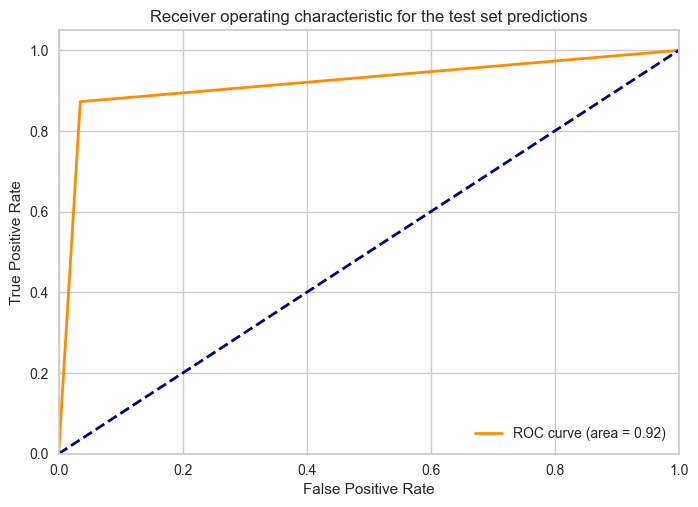

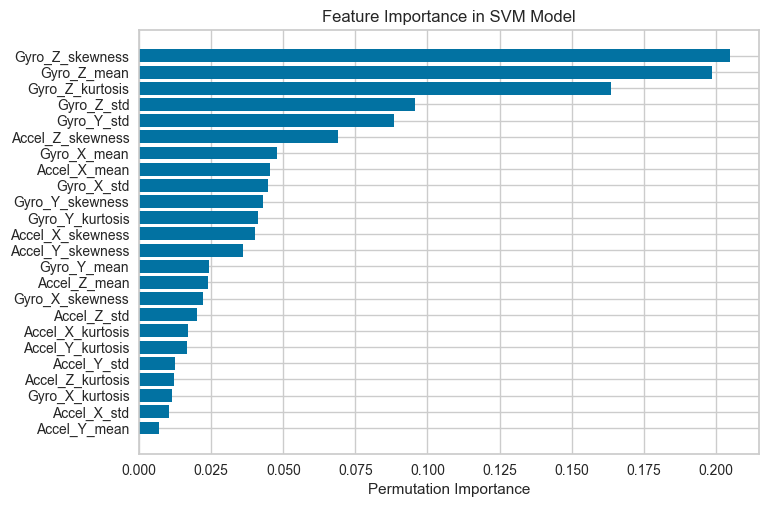

precision:  0.9284498052053602 recall:  0.9275862068965517 f1_score 0.9270738131826377
Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 9 operations to synchronize with Neptune. Do not kill this process.
All 9 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/shehjar/ADHD-SVM/e/AD-168/metadata
https://app.neptune.ai/shehjar/ADHD-SVM/e/AD-169
========================= CV folds ========================= 10
StratifiedKFold Spliitting: m
grid_search GridSearchCV() Done...
grid_search fit() Done...
X_train_fold:  (926, 24) y_train_fold:  (926,)
TP:  94 TN:  126 FP:  5 FN:  7
X_train_fold:  (926, 24) y_train_fold:  (926,)
TP:  78 TN:  141 FP:  7 FN:  6
X_train_fold:  (926, 24) y_train_fold:  (926,)
TP:  76 TN:  142 FP:  6 FN:  8
X_train_fold:  (926, 24) y_train_fold:  (926,)
TP:  84 TN:  135 FP:  7 FN:  6
X_train_fold:  (926, 24) y_train_fold:  (926,)
TP:  85 TN:  134 FP:  3 FN:  10
X_train_fold:  (926

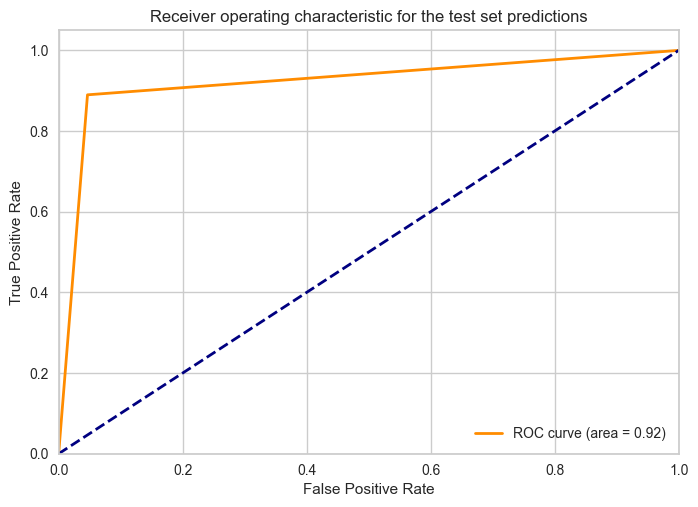

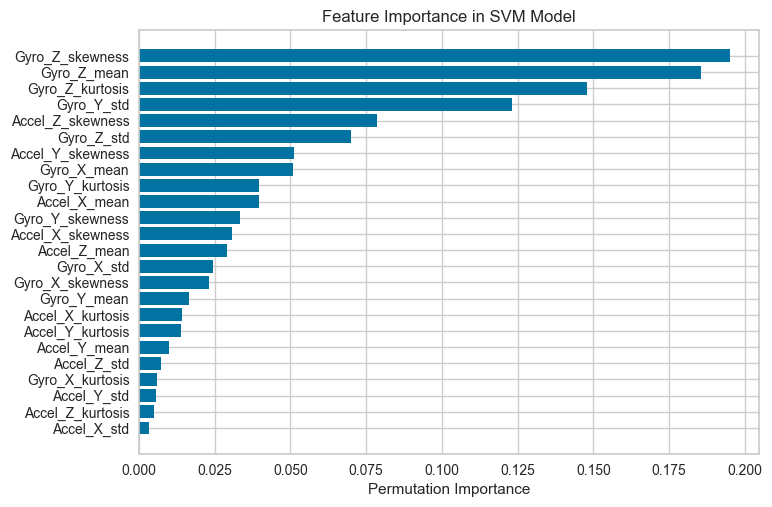

precision:  0.9276318942673556 recall:  0.9275862068965517 f1_score 0.9273212312832904
Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 9 operations to synchronize with Neptune. Do not kill this process.
All 9 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/shehjar/ADHD-SVM/e/AD-169/metadata
https://app.neptune.ai/shehjar/ADHD-SVM/e/AD-170
========================= CV folds ========================= 15
StratifiedKFold Spliitting: m
grid_search GridSearchCV() Done...
grid_search fit() Done...
X_train_fold:  (926, 24) y_train_fold:  (926,)
TP:  93 TN:  127 FP:  4 FN:  8
X_train_fold:  (926, 24) y_train_fold:  (926,)
TP:  78 TN:  140 FP:  8 FN:  6
X_train_fold:  (926, 24) y_train_fold:  (926,)
TP:  76 TN:  142 FP:  6 FN:  8
X_train_fold:  (926, 24) y_train_fold:  (926,)
TP:  85 TN:  135 FP:  7 FN:  5
X_train_fold:  (926, 24) y_train_fold:  (926,)
TP:  84 TN:  134 FP:  3 FN:  11
X_train_fold:  (926

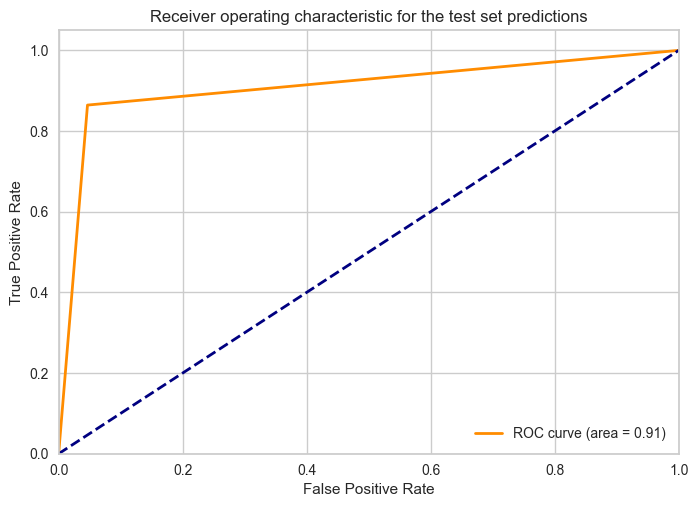

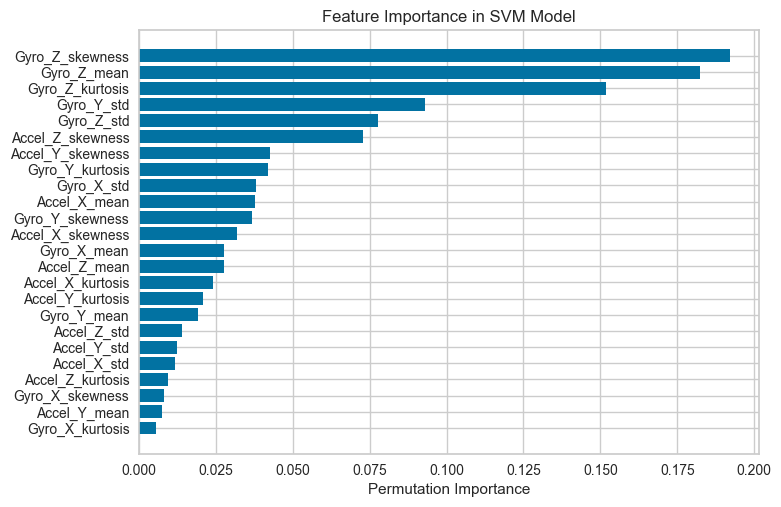

precision:  0.9176872169975618 recall:  0.9172413793103448 f1_score 0.9167299125556839
Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 9 operations to synchronize with Neptune. Do not kill this process.
All 9 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/shehjar/ADHD-SVM/e/AD-170/metadata


In [40]:
##########################################################################################
# Data with all the STATISTICAL variables
##########################################################################################
df_new_norm_Std = df_filtered_outliers_normalized[['Accel_X_mean', 'Accel_Y_mean', 'Accel_Z_mean',
                                 'Gyro_X_mean','Gyro_Y_mean', 'Gyro_Z_mean', 
                                 'Accel_X_std', 'Accel_Y_std', 'Accel_Z_std',
                               'Gyro_X_std', 'Gyro_Y_std', 'Gyro_Z_std', 
                               'Accel_X_kurtosis','Accel_Y_kurtosis','Accel_Z_kurtosis', 
                                'Gyro_X_kurtosis', 'Gyro_Y_kurtosis', 'Gyro_Z_kurtosis', 
                                'Accel_X_skewness','Accel_Y_skewness','Accel_Z_skewness', 
                                 'Gyro_X_skewness', 'Gyro_Y_skewness', 'Gyro_Z_skewness']] # all the variables.
df_new_norm_Std["type"] = df_filtered_outliers_normalized["type"]
# Run the function on the py
svm_results_norm_std = svm_cross_validation_with_cm(df_new_norm_Std)



In [ ]:
##########################################################################################
# Data with all the STATISTICAL variables
##########################################################################################
df_new_norm_Std_bt = df_filtered_outliers_normalized[['Accel_X_mean', 'Accel_Y_mean', 'Accel_Z_mean',
                                 'Gyro_X_mean','Gyro_Y_mean', 'Gyro_Z_mean', 
                                 'Accel_X_std', 'Accel_Y_std', 'Accel_Z_std',
                               'Gyro_X_std', 'Gyro_Y_std', 'Gyro_Z_std', 
                               'Accel_X_kurtosis','Accel_Y_kurtosis','Accel_Z_kurtosis', 
                                'Gyro_X_kurtosis', 'Gyro_Y_kurtosis', 'Gyro_Z_kurtosis', 
                                'Accel_X_skewness','Accel_Y_skewness','Accel_Z_skewness', 
                                 'Gyro_X_skewness', 'Gyro_Y_skewness', 'Gyro_Z_skewness']] # all the variables.
df_new_norm_Std_bt["BehaviourTypeCleaned"] = df_filtered_outliers_normalized["BehaviourTypeCleaned"]

svm_results_norm_std_bt = svm_cross_validation_with_cm(df_new_norm_Std_bt)



In [ ]:
svm_results_norm_std["cross_val_results"]

In [ ]:


##########################################################################################
# Data with Vector Magnitude only.
##########################################################################################
vec_mag_df = df[[#'Accel_Vecdis_mean','Gyro_Vecdis_mean','Magno_Vecdis_mean',
 'Accel_Vecdis_std', 'Gyro_Vecdis_std', 'Magno_Vecdis_std',
'Accel_Vecdis_kurtosis', 'Gyro_Vecdis_kurtosis','Magno_Vecdis_kurtosis',
 'Accel_Vecdis_skewness', 'Gyro_Vecdis_skewness','Magno_Vecdis_skewness']] # all the variables.
vec_mag_df["type"] = df["type"]

# df_new["Participent"] = df["Participent"]
# Run the function on the provided data
svm_results_vec_mag = svm_cross_validation_with_cm(vec_mag_df)



In [ ]:
svm_results_vec_mag["cross_val_results"]

In [ ]:
##########################################################################################
# Data with Vector Magnitude only.
##########################################################################################
vec_mag_df2 = df[['Gyro_Vecdis_kurtosis',
 'Accel_Vecdis_skewness', 'Gyro_Vecdis_skewness']] # all the variables.
vec_mag_df2["type"] = df["type"]

# df_new["Participent"] = df["Participent"]
# Run the function on the provided data
svm_results_vec_mag2 = svm_cross_validation_with_cm(vec_mag_df2)



In [ ]:
svm_results_vec_mag2["cross_val_results"]

In [ ]:

# Call the function on the sample dataframe for demonstration
outer_results = svm_nested_losocv(df_new, 'Participent')


In [ ]:
outer_results

In [ ]:
################################################################################
# Kurtosis Info only
################################################################################

features = ['Accel_X_kurtosis', 'Accel_Y_kurtosis',
       'Accel_Z_kurtosis', 'Gyro_X_kurtosis', 'Gyro_Y_kurtosis',
       'Gyro_Z_kurtosis', 'Magno_X_kurtosis', 'Magno_Y_kurtosis','type']

subset_df_kurt = df[features]

# Run the function on the provided data
svm_results3 = svm_cross_validation_with_cm(subset_df_kurt)


In [ ]:
svm_results3["cross_val_results"]

In [ ]:
svm_results3["confusion_matrix"]

In [ ]:
################################################################################
# Skewness Info only
################################################################################

features_skewness = ['Accel_X_skewness', 'Accel_Y_skewness',
       'Accel_Z_skewness', 'Gyro_X_skewness', 'Gyro_Y_skewness',
       'Gyro_Z_skewness', 'Magno_X_skewness', 'Magno_Y_skewness',
       'Magno_Z_skewness','type']

subset_df_skewness = df[features_skewness]

# Run the function on the provided data
svm_results4 = svm_cross_validation_with_cm(subset_df_skewness)


In [ ]:
svm_results4["cross_val_results"]

In [ ]:
svm_results4["confusion_matrix"]

In [ ]:

# Filtering strings containing 'Vecdis'
vecdis_strings = [s for s in df.columns if "Vecdis" in s]
vecdis_strings

In [ ]:
vec_mag_columns = ['Accel_Vecdis_kurtosis',
 'Gyro_Vecdis_kurtosis',
 'Magno_Vecdis_kurtosis','Accel_Vecdis_skewness',
 'Gyro_Vecdis_skewness',
 'Magno_Vecdis_skewness']

subset_df_vec_mag = df[vec_mag_columns]
subset_df_vec_mag["type"] = df["type"]
# Run the function on the provided subset_df_vec_mag
svm_results5 = svm_cross_validation_with_cm(subset_df_vec_mag)


In [ ]:
svm_results5["cross_val_results"]

In [ ]:
svm_results5["confusion_matrix"]

In [ ]:
vec_mag_columns = ['Accel_Vecdis_median', 'Gyro_Vecdis_median',
       'Accel_X_std', 'Accel_Y_std', 'Accel_Z_std', 'Gyro_X_std', 'Gyro_Y_std',
       'Gyro_Z_std', #'Magno_X_std', 'Magno_Y_std', 'Magno_Z_std',
       'Accel_Vecdis_std', 'Gyro_Vecdis_std', 'Magno_Vecdis_std',
       # 'Accel_X_kurtosis', 'Accel_Y_kurtosis', 'Accel_Z_kurtosis',
       # 'Gyro_X_kurtosis', 'Gyro_Y_kurtosis', 'Gyro_Z_kurtosis',
       # 'Magno_X_kurtosis', 'Magno_Y_kurtosis', 'Magno_Z_kurtosis',
       'Accel_Vecdis_kurtosis', 'Gyro_Vecdis_kurtosis']

subset_df_vec_mag = df_filtered_outliers[vec_mag_columns]
subset_df_vec_mag["type"] = df_filtered_outliers["type"]
# Run the function on the provided subset_df_vec_mag
svm_results5 = svm_cross_validation_with_cm(subset_df_vec_mag)


In [ ]:
svm_results5["cross_val_results"]

In [ ]:
svm_results5["confusion_matrix"]

In [ ]:

df_amp = [
    "Accel_X_dominant_freq",
"Accel_Y_dominant_freq",
"Accel_Z_dominant_freq",
"Gyro_X_dominant_freq",
"Gyro_Y_dominant_freq",
"Gyro_Z_dominant_freq",
"Magno_X_dominant_freq",
"Magno_Y_dominant_freq",
"Magno_Z_dominant_freq",
"Accel_X_max_amplitude",
"Accel_Y_max_amplitude",
"Accel_Z_max_amplitude",
"Gyro_X_max_amplitude",
"Gyro_Y_max_amplitude",
"Gyro_Z_max_amplitude",
"Magno_X_max_amplitude",
"Magno_Y_max_amplitude",
"Magno_Z_max_amplitude"]

subset_df_df_amp = df_combined[df_amp]
subset_df_df_amp["type"] = df_combined["type"]
# Run the function on the provided subset_df_vec_mag
svm_results_df_amp = svm_cross_validation_with_cm(subset_df_df_amp)


In [ ]:
svm_results_df_amp["cross_val_results"]

In [ ]:
for i in df.columns:
    print(i)

In [32]:
df_fft = ["Accel_X_sum_fft", "Accel_Y_sum_fft", "Accel_Z_sum_fft",
          "Gyro_X_sum_fft", "Gyro_Y_sum_fft", "Gyro_Z_sum_fft",
          "Accel_X_diff_sum_fft","Accel_Y_diff_sum_fft", "Accel_Z_diff_sum_fft",
          "Gyro_X_diff_sum_fft","Gyro_Y_diff_sum_fft", "Gyro_Z_diff_sum_fft",
          "Accel_X_AUC_fft","Accel_Y_AUC_fft","Accel_Z_AUC_fft",
          "Gyro_X_AUC_fft","Gyro_Y_AUC_fft","Gyro_Z_AUC_fft" ]
# df_combined["type"].value_counts()

In [ ]:

subset_df_raw = df_combined[df_fft]
subset_df_raw["type"] = df_combined["type"]
# Run the function on the provided subset_df_vec_mag
svm_results_df_raw= svm_cross_validation_with_cm(subset_df_raw)


/var/folders/d3/mwqwbw3x0b30c22zykpzcrww0000gn/T/ipykernel_26638/2758205346.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/d3/mwqwbw3x0b30c22zykpzcrww0000gn/T/ipykernel_26638/4157405955.py:27: NeptuneWarning:

The following monitoring options are disabled by default in interactive sessions: 'capture_stdout', 'capture_stderr', 'capture_traceback', and 'capture_hardware_metrics'. To enable them, set each parameter to 'True' when initializing the run. The monitoring will continue until you call run.stop() or the kernel stops. Also note: Your source files can only be tracked if you pass the path(s) to the 'source_code' argument. For help, see the Neptune docs: https://docs.neptune.ai/logging/source_code/



Original dataframe:  (3283, 19)
X_train:  (2626, 18) y_train: (2626,) value counts in train: type
0    1613
1    1013
Name: count, dtype: int64
X_test:  (657, 18) y_test:   (657,) value counts in test: type
0    403
1    254
Name: count, dtype: int64
max_splits:  1013
https://app.neptune.ai/shehjar/ADHD-SVM/e/AD-165
========================= CV folds ========================= 5
StratifiedKFold Spliitting: m
grid_search GridSearchCV() Done...
grid_search fit() Done...
X_train_fold:  (2100, 18) y_train_fold:  (2100,)
TP:  74 TN:  286 FP:  33 FN:  133
X_train_fold:  (2100, 18) y_train_fold:  (2100,)
TP:  76 TN:  276 FP:  44 FN:  130
X_train_fold:  (2100, 18) y_train_fold:  (2100,)
TP:  72 TN:  287 FP:  39 FN:  128
X_train_fold:  (2100, 18) y_train_fold:  (2100,)
TP:  62 TN:  298 FP:  40 FN:  126
X_train_fold:  (2100, 18) y_train_fold:  (2100,)
TP:  72 TN:  286 FP:  33 FN:  135


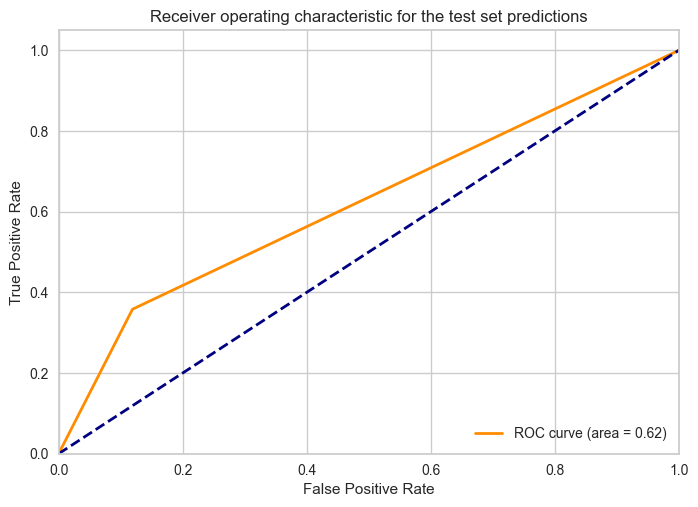

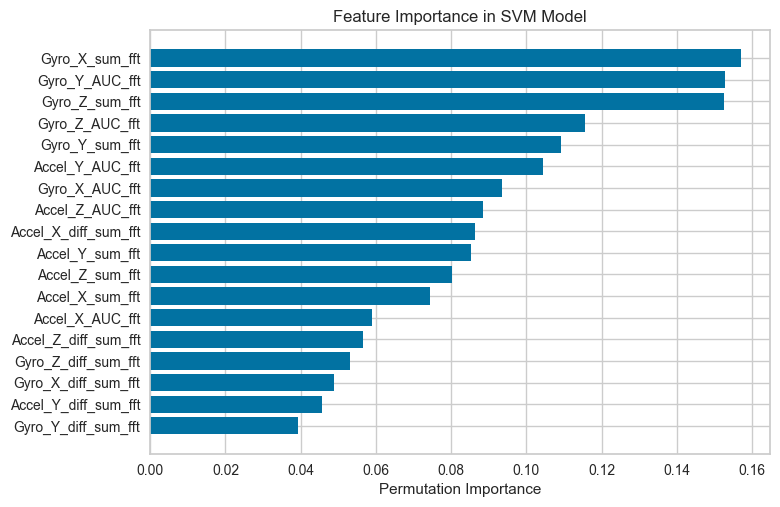

precision:  0.6734779733202912 recall:  0.6788432267884322 f1_score 0.6519051446763813
Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 9 operations to synchronize with Neptune. Do not kill this process.
All 9 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/shehjar/ADHD-SVM/e/AD-165/metadata
https://app.neptune.ai/shehjar/ADHD-SVM/e/AD-166
========================= CV folds ========================= 10
StratifiedKFold Spliitting: m
grid_search GridSearchCV() Done...
grid_search fit() Done...
X_train_fold:  (2100, 18) y_train_fold:  (2100,)
TP:  74 TN:  286 FP:  33 FN:  133
X_train_fold:  (2100, 18) y_train_fold:  (2100,)
TP:  76 TN:  276 FP:  44 FN:  130
X_train_fold:  (2100, 18) y_train_fold:  (2100,)
TP:  72 TN:  287 FP:  39 FN:  128
X_train_fold:  (2100, 18) y_train_fold:  (2100,)
TP:  62 TN:  298 FP:  40 FN:  126
X_train_fold:  (2100, 18) y_train_fold:  (2100,)
TP:  72 TN:  286 FP:  33 FN: 

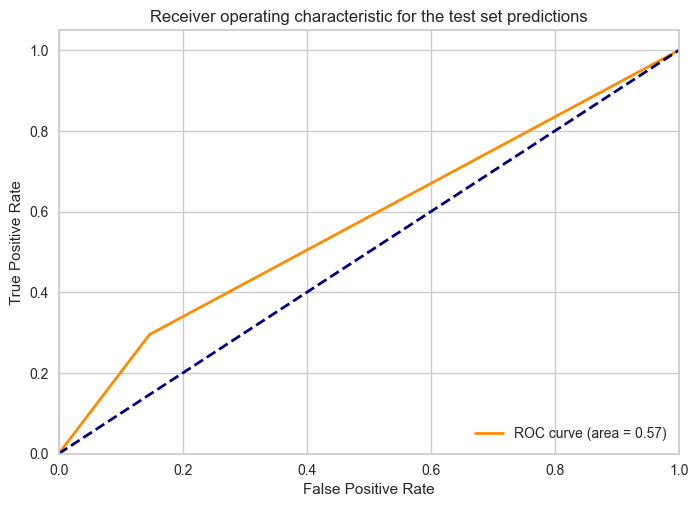

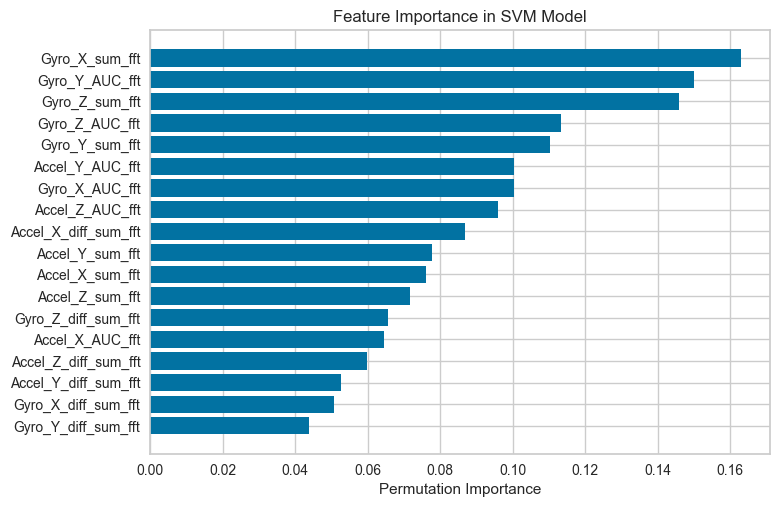

precision:  0.6198400681923507 recall:  0.6377473363774734 f1_score 0.6052009780751222
Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 9 operations to synchronize with Neptune. Do not kill this process.
All 9 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/shehjar/ADHD-SVM/e/AD-166/metadata
https://app.neptune.ai/shehjar/ADHD-SVM/e/AD-167
========================= CV folds ========================= 15
StratifiedKFold Spliitting: m
grid_search GridSearchCV() Done...
grid_search fit() Done...
X_train_fold:  (2100, 18) y_train_fold:  (2100,)
TP:  74 TN:  286 FP:  33 FN:  133
X_train_fold:  (2100, 18) y_train_fold:  (2100,)
TP:  76 TN:  276 FP:  44 FN:  130
X_train_fold:  (2100, 18) y_train_fold:  (2100,)
TP:  72 TN:  287 FP:  39 FN:  128
X_train_fold:  (2100, 18) y_train_fold:  (2100,)
TP:  62 TN:  298 FP:  40 FN:  126
X_train_fold:  (2100, 18) y_train_fold:  (2100,)
TP:  72 TN:  286 FP:  33 FN: 

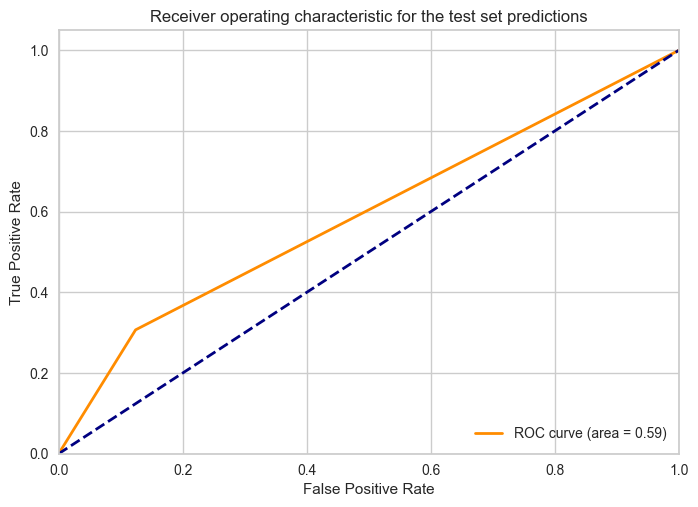

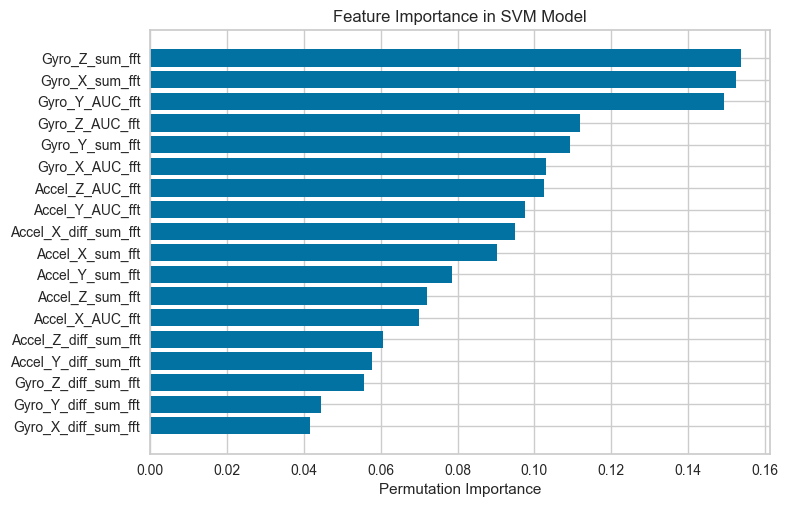

precision:  0.6449038887594123 recall:  0.6560121765601218 f1_score 0.6225335962335378
Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 9 operations to synchronize with Neptune. Do not kill this process.
All 9 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/shehjar/ADHD-SVM/e/AD-167/metadata


In [33]:
# df_standing_normalized = normalize_dataset(df_combined)
# df_filtered_outliers = run_outlier_code(df_standing_normalized)

subset_df_normalized = df_filtered_outliers_normalized[df_fft]
subset_df_normalized["type"] = df_filtered_outliers_normalized["type"]
# Run the function on the provided subset_df_vec_mag
svm_results_df_normalized= svm_cross_validation_with_cm(subset_df_normalized)


In [ ]:
subset_df_normalized.to_csv("~/Desktop/normalized_df.csv")

In [ ]:


subset_df_smote = df_SMOTE_resampled[df_fft]
subset_df_smote["type"] = df_SMOTE_resampled["type"]
# Run the function on the provided subset_df_vec_mag
svm_results_df_smote,bestsvm = svm_cross_validation_with_cm(subset_df_smote)


In [ ]:
svm_results_df_smote["cross_val_results"]

In [ ]:
subset_df_fft = df_filtered_outliers[df_fft]
subset_df_fft["type"] = df_filtered_outliers["type"]
# Run the function on the provided subset_df_vec_mag
svm_results_df_fft = svm_cross_validation_with_cm(subset_df_fft)


In [ ]:
subset_df_fft_smote = df_standing_normalized[df_fft]
subset_df_fft_smote["type"] = df_standing_normalized["type"]
# Run the function on the provided subset_df_vec_mag
svm_results_df_fft_smote = svm_cross_validation_with_cm(subset_df_fft_smote)


In [ ]:

df_fft_sums = [ #"Accel_X_skewness_fft","Accel_Y_skewness_fft","Accel_Z_skewness_fft",
          #"Gyro_X_skewness_fft", "Gyro_Y_skewness_fft", "Gyro_Z_skewness_fft" , 
          "Accel_X_sum_fft", "Accel_Y_sum_fft", "Accel_Z_sum_fft",
          "Gyro_X_sum_fft", "Gyro_Y_sum_fft", "Gyro_Z_sum_fft"]
          # "Accel_X_diff_sum_fft","Accel_Y_diff_sum_fft", "Accel_Z_diff_sum_fft",
          # "Gyro_X_diff_sum_fft","Gyro_Y_diff_sum_fft", "Gyro_Z_diff_sum_fft"]
          #"Accel_X_AUC_fft","Accel_Y_AUC_fft","Accel_Z_AUC_fft",
          #"Gyro_X_AUC_fft","Gyro_Y_AUC_fft","Gyro_Z_AUC_fft" ]

         
 
subset_df_sum = df_SMOTE_resampled[df_fft_sums]
subset_df_sum["type"] = df_SMOTE_resampled["type"]
# Run the function on the provided subset_df_vec_mag
svm_results_sum = svm_cross_validation_with_cm(subset_df_sum)



In [ ]:
svm_results_sum["cross_val_results"]

In [ ]:

df_fft_diff_sums = [ "Accel_X_diff_sum_fft","Accel_Y_diff_sum_fft", "Accel_Z_diff_sum_fft",
           "Gyro_X_diff_sum_fft","Gyro_Y_diff_sum_fft", "Gyro_Z_diff_sum_fft"]
subset_df_diff_sum = df_SMOTE_resampled[df_fft_diff_sums]
subset_df_diff_sum["type"] = df_SMOTE_resampled["type"]
# Run the function on the provided subset_df_vec_mag
svm_results_sum_diff = svm_cross_validation_with_cm(subset_df_diff_sum)



In [ ]:
svm_results_sum["cross_val_results"]

In [ ]:
df_fft_auc = ["Accel_X_AUC_fft","Accel_Y_AUC_fft","Accel_Z_AUC_fft",
          "Gyro_X_AUC_fft","Gyro_Y_AUC_fft","Gyro_Z_AUC_fft"]
subset_df_auc = df_SMOTE_resampled[df_fft_auc]
subset_df_auc["type"] =df_SMOTE_resampled["type"]
# Run the function on the provided subset_df_vec_mag
svm_results_fft_auc = svm_cross_validation_with_cm(subset_df_auc)



In [ ]:
svm_results_fft_auc["cross_val_results"]

In [ ]:

df_fft_sum_auc = [ "Accel_X_sum_fft", "Accel_Y_sum_fft", "Accel_Z_sum_fft",
          "Gyro_X_sum_fft", "Gyro_Y_sum_fft", "Gyro_Z_sum_fft",
          "Accel_X_AUC_fft","Accel_Y_AUC_fft","Accel_Z_AUC_fft",
          "Gyro_X_AUC_fft","Gyro_Y_AUC_fft","Gyro_Z_AUC_fft"]
subset_df_fft_sum_auc = df_SMOTE_resampled[df_fft_sum_auc]
subset_df_fft_sum_auc["type"] = df_SMOTE_resampled["type"]


In [ ]:
# Run the function on the provided subset_df_vec_mag
svm_results_df_fft_sum,best_svm_fft_sum = svm_cross_validation_with_cm(subset_df_fft_sum_auc)


In [ ]:
svm_results_df_fft_sum["cross_val_results"]

In [ ]:
from joblib import dump, load

In [ ]:
import joblib

In [ ]:

best_svm_fft_sum_auc_pickel = pickle.dumps(best_svm_fft_sum)


In [ ]:
joblib.dump(best_svm_fft_sum_auc_pickel, './fft_sum_auc_svm.pkl')

In [ ]:
clf2 = pickle.loads(s)
clf2.predict(X[0:1])

## KNN Model

In [ ]:

def knn_cross_validation_with_cm(dataframe, test_size=0.2, random_state=42):
    """
    Trains a KNN model using cross-validation on a given dataframe and returns the confusion matrix for the best model.
    
    Parameters:
    - dataframe (pd.DataFrame): The input data.
    - test_size (float): Proportion of the dataset to include in the test split.
    - random_state (int): Random seed.
    
    Returns:
    - dict: Contains results of the cross-validation and confusion matrix.
    """
    np_scaled = scaler.fit_transform(dataframe)
    dataframe_scaled = pd.DataFrame(np_scaled)
    dataframe_scaled.columns = dataframe.columns
    # Split data into train and test sets with shuffling
    train_data, test_data = train_test_split(dataframe_scaled, test_size=test_size, shuffle=True,random_state=random_state)
    
    # Extract features and target variable from training data
    X_train = train_data.drop(columns=['type'])
    y_train = train_data['type']
    
    # Extract features and target variable from test data
    X_test = test_data.drop(columns=['type'])
    y_test = test_data['type']

    # Define a pipeline: Standardization + KNN
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())
    ])

    # Hyperparameters for KNN
    param_grid = {
        'knn__n_neighbors': list(range(1, 11)),
        'knn__weights': ['uniform', 'distance'],
        'knn__metric': ['euclidean', 'manhattan']
    }

    results = []

    # Determine the maximum number of splits based on the class with the fewest samples
    max_splits = min(y_train.value_counts())

    # Hyperparameter tuning and cross-validation
    for folds in [5, 10, min(15, max_splits)]:
        skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=random_state)

        grid_search = GridSearchCV(pipeline, param_grid, cv=skf, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_params = grid_search.best_params_
        best_model = grid_search.best_estimator_

        train_accuracies, test_accuracies, sensitivities, specificities = [], [], [], []
        for train_index, val_index in skf.split(X_train, y_train):
            X_train_fold, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
            y_train_fold, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

            best_model.fit(X_train_fold, y_train_fold)

            # Compute confusion matrix for this fold
            cm = confusion_matrix(y_val, best_model.predict(X_val))
            TP = cm[1,1]
            TN = cm[0,0]
            FP = cm[0,1]
            FN = cm[1,0]

            sensitivity = TP / (TP + FN)
            specificity = TN / (TN + FP)

            train_accuracies.append(accuracy_score(y_train_fold, best_model.predict(X_train_fold)))
            test_accuracies.append(accuracy_score(y_val, best_model.predict(X_val)))
            sensitivities.append(sensitivity)
            specificities.append(specificity)

        results.append({
            'folds': folds,
            'best_params': best_params,
            'mean_train_accuracy': np.mean(train_accuracies),
            'mean_test_accuracy': np.mean(test_accuracies),
            'mean_sensitivity': np.mean(sensitivities),
            'mean_specificity': np.mean(specificities)
        })

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)

    # Identify the model with the highest mean test accuracy
    best_model_params = results_df.sort_values(by="mean_test_accuracy", ascending=False).iloc[0]['best_params']

    # Train the best model on the entire training set
    best_knn = KNeighborsClassifier(n_neighbors=best_model_params['knn__n_neighbors'], 
                                    weights=best_model_params['knn__weights'], 
                                    metric=best_model_params['knn__metric'])
    best_knn.fit(StandardScaler().fit_transform(X_train), y_train)

    # Predict on the test set and compute the confusion matrix
    y_pred = best_knn.predict(StandardScaler().fit_transform(X_test))
    cm = confusion_matrix(y_test, y_pred)

    return {
        "cross_val_results": results_df,
        "confusion_matrix": cm
    }


In [ ]:
# Run the function for KNN on the provided data
knn_results_cm = knn_cross_validation_with_cm(subset_df_factors)
knn_results_cm["cross_val_results"]


In [ ]:
knn_results_cm['confusion_matrix']


In [ ]:
# Run the function for KNN on the provided data
knn_results_cm2 = knn_cross_validation_with_cm(subset_df_factors)
knn_results_cm2["cross_val_results"]


In [ ]:
knn_results_cm2['confusion_matrix']


# Random Forest

In [ ]:

def rf_cross_validation_with_cm(dataframe, test_size=0.2):
    """
    Trains a Random Forest model using cross-validation on a given dataframe and returns the confusion matrix for the best model.
    
    Parameters:
    - dataframe (pd.DataFrame): The input data.
    - test_size (float): Proportion of the dataset to include in the test split.
    
    Returns:
    - dict: Contains results of the cross-validation and confusion matrix.
    """
    # Split data into train and test sets with shuffling
    train_data, test_data = train_test_split(dataframe, test_size=test_size, shuffle=True, random_state=8)
   
    # Extract features and target variable
    X_train = train_data.drop(columns=['type'])
    y_train = train_data['type']
    X_test = test_data.drop(columns=['type'])
    y_test = test_data['type']

    # Define a pipeline with Random Forest
    pipeline = Pipeline([
        ('rf', RandomForestClassifier(random_state=8))
    ])

    # Hyperparameters for Random Forest
    param_grid = {
        'rf__n_estimators': [100, 200, 300],
        'rf__max_depth': [None, 10, 20, 30],
        'rf__min_samples_split': [2, 5, 10]
    }

    results = []

    # Determine the maximum number of splits based on the class with the fewest samples
    max_splits = min(y_train.value_counts())

    # Hyperparameter tuning and cross-validation
    for folds in [5, 6, 7, 8, 9, min(10, max_splits)]:
        run = neptune.init_run(
            project="shehjar/ADHD-SVM",
            api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJlMGQxM2Q4ZC00ODE4LTRhNDMtYWY1Yy1kMGIzZTI5MzcxMzUifQ==",
            name= str(folds) + "-Fold"+ "test_size_" + str(test_size) + "_RF"   # Set your custom run name here
        )  # your credential
        run['feature_list'] = dataframe.columns
        # File
        run["data/feature_table"].upload(File.as_html(dataframe))
        skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=8)
        grid_search = GridSearchCV(pipeline, param_grid, cv=skf, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        best_params = grid_search.best_params_
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)

        run["cls_summary"] = npt_utils.create_classifier_summary(best_model, X_train, X_test, y_train, y_test)
        run["params"] = best_params
        train_accuracies, test_accuracies, sensitivities, specificities = train_test_accuracies(X_train, y_train,skf,best_model,best_params)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)
    
        # Plot ROC Curve
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic for the test set predictions')
        plt.legend(loc="lower right")
        # Save the ROC curve as an image
        roc_curve_image_path = 'roc_curve_class.png'
        plt.savefig(roc_curve_image_path)
        # Log the ROC curve image
        run['roc_curve'].upload(neptune.types.File(roc_curve_image_path))
        plt.show()
        
        report = classification_report(y_test, y_pred, output_dict=True)
        precision = report['weighted avg']['precision']
        recall = report['weighted avg']['recall']
        f1_score = report['weighted avg']['f1-score']
        print("precision: ",precision,"recall: ",recall,"f1_score",f1_score)
        run['precision'] = np.mean(precision)
        run['recall'] = np.mean(recall)
        run['f1_score'] = np.mean(f1_score)
        run['mean_train_accuracy'] = np.mean(train_accuracies)
        run['mean_test_accuracy'] = np.mean(test_accuracies)
        run['mean_sensitivity'] = np.mean(sensitivities)

        results.append({
            'folds': folds,
            'best_params': best_params,
            'mean_train_accuracy': np.mean(train_accuracies),
            'mean_test_accuracy': np.mean(test_accuracies),
            'mean_sensitivity': np.mean(sensitivities),
            'mean_specificity': np.mean(specificities),
            'train_test_diff': np.mean(train_accuracies)-np.mean(test_accuracies),
            'spec_sen_diff':  np.abs(np.mean(sensitivities) - np.mean(specificities)),
        })

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)

    # Identify the model with the highest mean test accuracy
    best_model_params = results_df.sort_values(by="mean_test_accuracy", ascending=False).iloc[0]['best_params']

    return results_df


In [ ]:
# Can do it since the number of rows remanin same only columns change.

# Run the function on the provided data
subset_df_my_list3_random_forest = rf_cross_validation_with_cm(df_filtered_outliers_normalized, test_size=0.2) #svm_cross_validation_with_cm(subset_df_my_list3)

In [ ]:
fig = px.box(df, x="type", y="Accel_X_mean")
fig.show()

In [ ]:
fig = px.box(df, x="type", y="Accel_Y_mean")
fig.show()

In [ ]:
fig = px.box(df, x="type", y="Accel_Z_mean")
fig.show()

In [ ]:
fig = px.box(df, x="type", y="Gyro_X_mean")
fig.show()

In [ ]:
fig = px.box(df, x="type", y="Gyro_Y_mean")
fig.show()

In [ ]:
fig = px.box(df, x="type", y="Gyro_Z_mean")
fig.show()

In [ ]:
fig = px.box(df, x="type", y="Accel_X_skewness")
fig.show()

In [ ]:
fig = px.box(df, x="type", y="Accel_Y_skewness") 
fig.show()

In [ ]:
fig = px.box(df, x="type", y="Accel_Z_skewness") 
fig.show()

In [ ]:
fig = px.box(df, x="type", y="Gyro_X_skewness")
fig.show()

In [ ]:
fig = px.box(df, x="type", y="Gyro_Y_skewness")
fig.show()

In [ ]:
fig = px.box(df, x="type", y="Gyro_Z_skewness")
fig.show()

In [ ]:
fig = px.box(df, x="type", y="Accel_X_kurtosis")
fig.show()

In [ ]:
fig = px.box(df, x="type", y="Accel_Y_kurtosis")
fig.show()

In [ ]:
fig = px.box(df, x="type", y="Accel_Z_kurtosis")
fig.show()

In [ ]:
df.columns
# # Gyro_X_mean,Accel_Y_skewness, Accel_Z_skewness,Accel_X_kurtosis

In [ ]:
fig = px.box(df, x="type", y="Gyro_X_kurtosis")
fig.show()



In [ ]:
fig = px.box(df, x="type", y="Gyro_Y_kurtosis")
fig.show()

In [ ]:
fig = px.box(df, x="type", y="Gyro_Z_kurtosis")
fig.show()

In [ ]:
fig = px.box(df, x="type", y="Accel_Vecdis_skewness") 




In [ ]:
fig = px.box(df, x="type", y="Gyro_Vecdis_skewness")
fig.show()




In [ ]:
fig = px.box(df, x="type", y="Magno_Vecdis_skewness")
fig.show()